
# Project: FBI Gun Data
### Eleftherios Kokkinis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    <li><a href="#question">Questions to be answered</a></li>
<li><a href="#wrangling">Data Wrangling - 1st Dataset - gun_data</a></li>
    <li><a href="#wrangling2">Data Wrangling - 2nd Dataset - census_data</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href='#question1'> Addressing Question 1</a></li>
    <li><a href='#question2'> Addressing Question 2</a></li>
    <li><a href='#question3'> Addressing Question 3</a></li>
    <li><a href='#question4'> Addressing Question 4</a></li>
        <li><a href='#5th question'> Addressing Question 5</a></li>
    <li><a href='#5th question2'> 2 Questions about the Census data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction - Our Data Sets

The dataset (*gun_data.xlsx*) that we are going to explore includes statistics about the firearm background checks initiated through NICS across the US.
The available data are dated from 1998-11 to 2017-09 and include numbers of firearm checks issued per type of gun and per transanctions type that triggered a background check.

**3 types of Guns**
- handgun
- long_gun
- other

**7 Batches of different transaction types**
 - **Prior** - The first batch of transaction types without specific name includes background checks initiated by an officially-licensed Federal Firearms Licensee (FFL) or criminal justice/law enforcement agency prior to the issuance of a firearm-related permit or transfer.
 - **Prepawn** 
 - **Redemption** 
 - **Returned** 
 - **Rentals**
 - **Private Sale**
 - **Returned** 

The second dataset (*U.S. Census Data.csv*) includes general statistics about each of the fifty US for several different years between 2010 and 2016.
We may attempt to explore potential relationships between those features/statistics and the numbers of firearm checks in the first dataset

In [1812]:
#Importing the libraries that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mno

<a id='question'></a>
# Questions that we will attempt to answer:

 - 1 - What is the overall trend of gun purchases? Does seasonality exist?
 - 2 - How do types of guns and transactions compare with one other?
 - 3 - Which states have had the largest change in firearm checks?
 - 4 - What's the percentage contribution of each state to the yearly gun checks across the US?
 - 5 - Which census data are associated with higher firearm checks?

<a id='wrangling'></a>
## Data Wrangling - gun_data

### Cleaning and organizing our datasets

In [1813]:
#Loading the two Dataset

gun_data=pd.read_excel('gun_data.xlsx')
census_data=pd.read_csv('U.S. Census Data.csv')

In [1814]:
#Checking the sizes of our datasets

gun_data.shape, census_data.shape,

((12485, 27), (85, 52))

In [1815]:
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [1816]:
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [1817]:
#Taking a glance at the properties of the first dataset

gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [1818]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [1819]:
#checking the unique states and territories included in each dataset

gun_data['state'].nunique() , census_data.columns.nunique()

(55, 52)

In [1820]:
#Checking the columns the states that do not exist in both datasets

states=[]
for state in gun_data['state'].unique():
    if state not in census_data.columns.unique():
        states.append(state)
print("States that do not exist in census data:",states)
        
columns=[]
for column in census_data.columns.unique():
    if column not in gun_data['state'].unique():
        columns.append(column)
print("Columns in census data that do not exist in gun data as states:",columns)

States that do not exist in census data: ['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']
Columns in census data that do not exist in gun data as states: ['Fact', 'Fact Note']


Looks like the gun_data dataset includes 5 territories not available in the census dataset. Since we will not be able to find meaningful relationships for these, we will drop them and keep just the 50 US.

In [1821]:
gun_data.drop(gun_data[gun_data.state.isin(states)].index,inplace=True)

In [1822]:
gun_data.shape

(11350, 27)

In [1823]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      11350 non-null  object 
 1   state                      11350 non-null  object 
 2   permit                     11348 non-null  float64
 3   permit_recheck             1000 non-null   float64
 4   handgun                    11350 non-null  float64
 5   long_gun                   11350 non-null  float64
 6   other                      5000 non-null   float64
 7   multiple                   11350 non-null  int64  
 8   admin                      11348 non-null  float64
 9   prepawn_handgun            9597 non-null   float64
 10  prepawn_long_gun           9595 non-null   float64
 11  prepawn_other              4650 non-null   float64
 12  redemption_handgun         9600 non-null   float64
 13  redemption_long_gun        9598 non-null   flo

- After making sure that the 'month' column has no missing values, we will rename it to the more general name 'Date', convert it into a datetime object that will make our analysis easier later on and set it as an index to our dataframe.

  (Before that, we will first check that each date/state pair is unique and no duplicates exist just so we avoid mistaking different rows as duplicates later on due to coincidentally having the same values.

In [1824]:
gun_data[['month','state']].duplicated().sum()

0

In [1825]:
gun_data['month'].nunique()*50

11350

 Each date/state pair is indeed unique and no duplicates exist. As we can see, the dataset is organised in such a way so that each unique date value includes information about each of the 50 states.

In [1826]:
#Renaming 'month' to 'Date'

gun_data.rename({'month':'Date'},axis=1,inplace=True)

In [1827]:
#Converting the Date column to datetime object.

gun_data['Date']=pd.to_datetime(gun_data['Date'], format='%Y-%m')

In [1828]:
#Setting the Date column as index to our dataframe
gun_data.set_index('Date',inplace=True)

In [1829]:
gun_data.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


Before we start dealing with missing values, we notice that each transaction batch includes information about 3 different gun types: **handgun**, **long_gun** and **other**. Since we intend to do comparisons between each transaction type, we will rename the relevant columns of the first batch to something more specific

In [1830]:
#defining a function for the renaming

def prior_rename(df,x):
    for i in x:
        df.rename(columns={i:'prior_'+i},inplace=True)
    return df

In [1831]:
cols=['handgun','long_gun','other']
prior_rename(gun_data,cols)

,state,permit,permit_recheck,prior_handgun,prior_long_gun,prior_other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-11-01,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
1998-11-01,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
1998-11-01,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408


### Dealing with missing values
We will proceed by looking into the missing data with more detail. For that purpose we imported the *missingno* module that will help us to visualize how the missing data points are formed and distributed in the dataset. That should help us to make sense out of them and decide how to deal with them.

In [1832]:
#Checking the size of missing data for each column
gun_data.isna().sum()

state                            0
permit                           2
permit_recheck               10350
prior_handgun                    0
prior_long_gun                   0
prior_other                   6350
multiple                         0
admin                            2
prepawn_handgun               1753
prepawn_long_gun              1755
prepawn_other                 6700
redemption_handgun            1750
redemption_long_gun           1752
redemption_other              6700
returned_handgun              9350
returned_long_gun             9400
returned_other                9700
rentals_handgun              10450
rentals_long_gun             10600
private_sale_handgun          8850
private_sale_long_gun         8850
private_sale_other            8850
return_to_seller_handgun      9100
return_to_seller_long_gun     8850
return_to_seller_other        9300
totals                           0
dtype: int64

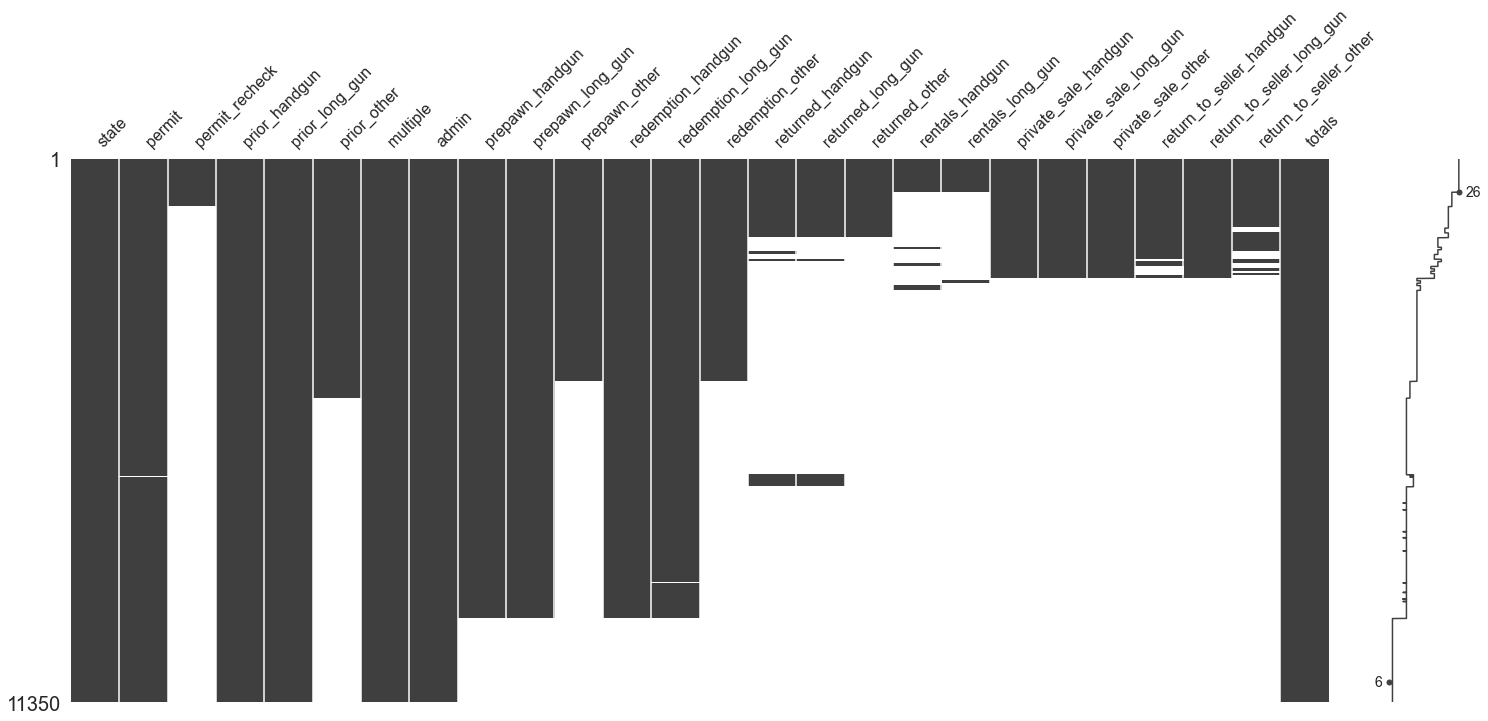

In [1833]:
#Visualizing the missing points
mno.matrix(gun_data);

As we can see the missing data are not arbitrarily distributed across each column. Most of the missing points are date specific which means there are no - or very few - available data prior to a specific date for each column.
 
In addition, we realize that several transaction types follow similar patterns in their missing data.
The groups of transactions that share similar patterns of missing data are;

- Permit, prior_handgun, prior_long_gun, admin
- Prepawn and redemption transactions for handgun & long_gun
- All the'other' types of guns for 'prior,'prepawn' and 'redemption' batches.
- The 'returned' batch
- The 'rental' batch
- Private and return_to_seller batches

These patterns can be further verified by looking into the correlation heatmap of mssing values:

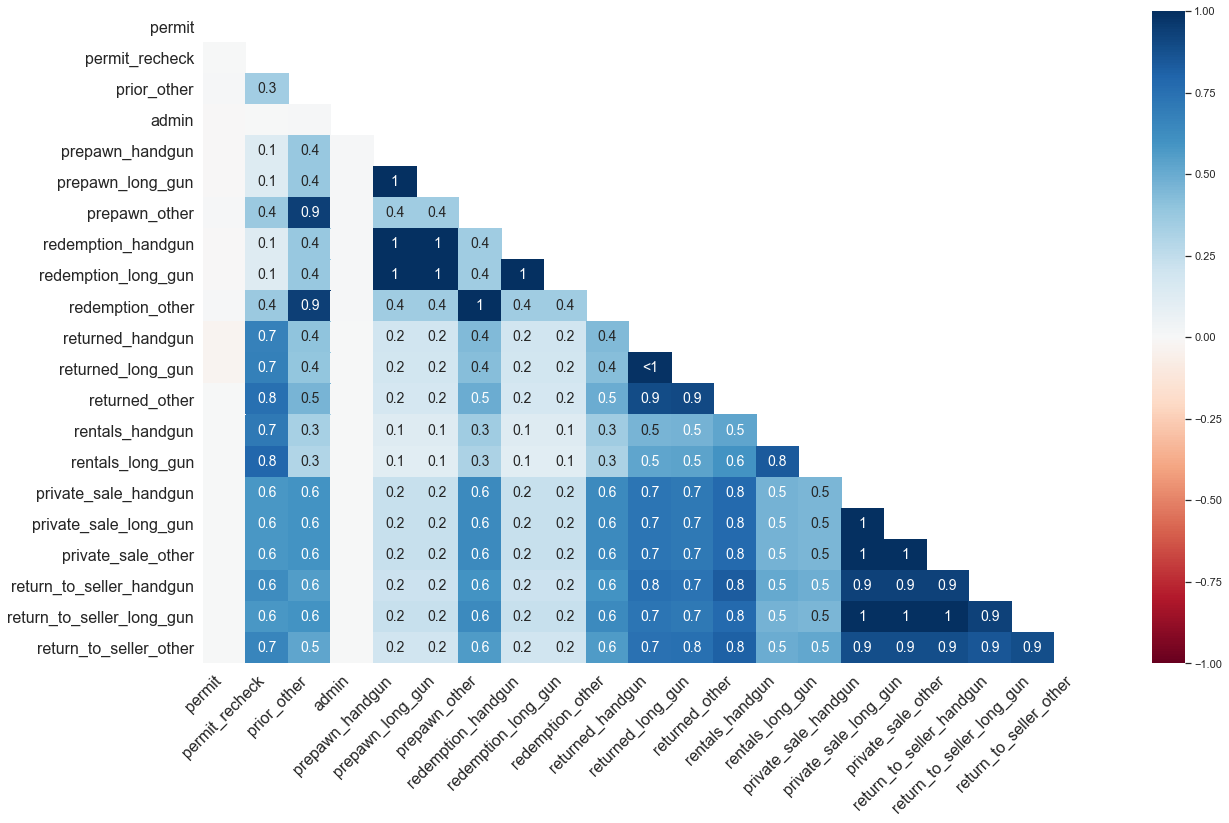

In [1834]:
mno.heatmap(gun_data);

First we will drop the 'permit_recheck' column as we do not need it in our analysis since it contains too many missing values and we already have the 'permit' column that is almost full.

In [1835]:
gun_data.drop('permit_recheck',axis=1,inplace=True)

In [1836]:
gun_data.head()

,state,permit,prior_handgun,prior_long_gun,prior_other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
2017-09-01,Alaska,209.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
2017-09-01,California,57839.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [1837]:
gun_data.isna().sum()

state                            0
permit                           2
prior_handgun                    0
prior_long_gun                   0
prior_other                   6350
multiple                         0
admin                            2
prepawn_handgun               1753
prepawn_long_gun              1755
prepawn_other                 6700
redemption_handgun            1750
redemption_long_gun           1752
redemption_other              6700
returned_handgun              9350
returned_long_gun             9400
returned_other                9700
rentals_handgun              10450
rentals_long_gun             10600
private_sale_handgun          8850
private_sale_long_gun         8850
private_sale_other            8850
return_to_seller_handgun      9100
return_to_seller_long_gun     8850
return_to_seller_other        9300
totals                           0
dtype: int64

Although we already got a pretty good idea of how our missing data look, we can further explore our time series to decide what's the best way to deal with them.
For that purpose we will define a couple of plotting functions.

In [1838]:
# first grouping by date

grouped_data=gun_data.groupby(['Date'],sort=True).mean()

In [1839]:
grouped_data

,permit,prior_handgun,prior_long_gun,prior_other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
Date,,,,,,,,,,,,,,,,,,,,,
1998-11-01,41.46,137.16,238.16,NaN,5.50,1.20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423.48
1998-12-01,1521.92,4254.74,11415.48,NaN,168.72,43.18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17404.04
1999-01-01,1541.44,3683.84,6196.36,NaN,149.88,139.86,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11711.38
1999-02-01,1695.18,4643.44,7046.88,NaN,184.42,227.42,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13797.34
1999-03-01,2063.70,4813.60,7533.72,NaN,190.58,223.08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14824.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-01,16617.96,11011.02,6557.70,585.94,338.52,12.08,4.56,3.36,0.50,605.38,...,1.80,0.10,0.02,37.08,25.28,2.10,0.78,0.86,0.38,37938.20
2017-06-01,16010.24,11352.60,6617.80,593.80,340.60,10.24,4.24,3.70,0.20,704.94,...,1.40,0.02,0.08,37.68,28.44,2.66,0.90,0.76,0.36,37724.80
2017-07-01,15095.96,9576.88,6440.40,536.76,313.64,17.30,4.50,3.38,0.26,622.58,...,1.46,0.10,0.04,33.62,24.30,2.08,0.68,0.68,0.16,34631.00


In [1840]:
def line_graph(x):
    sns.set(rc={'figure.figsize':(10, 6)})
    x.plot(marker='.',linestyle='--',linewidth=2)

def dot_graphs(df,x):
    axes= df[x].plot(marker='.',linestyle='None',figsize=(9,30),subplots=True)
    for ax in axes:
        ax.set_ylabel("Checks")
        

def line_graphs(df,x):
    axes= df[x].plot(marker='.',linestyle='--',figsize=(9,30),subplots=True)
    for ax in axes:
        ax.set_ylabel('Checks')

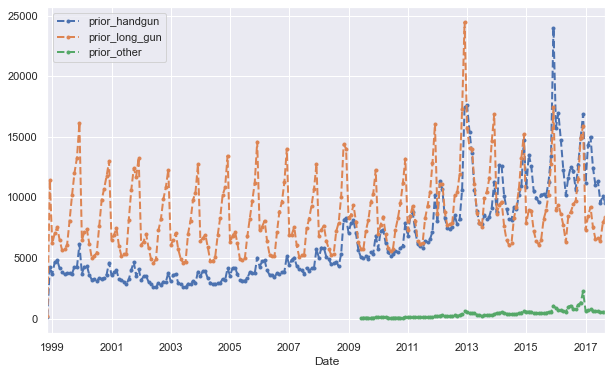

In [1841]:
#checking missing values of 'prior' transaction batch. Looks like the 'other' types of guns have no
#or very few values before 2010

line_graph(grouped_data[['prior_handgun','prior_long_gun','prior_other']])

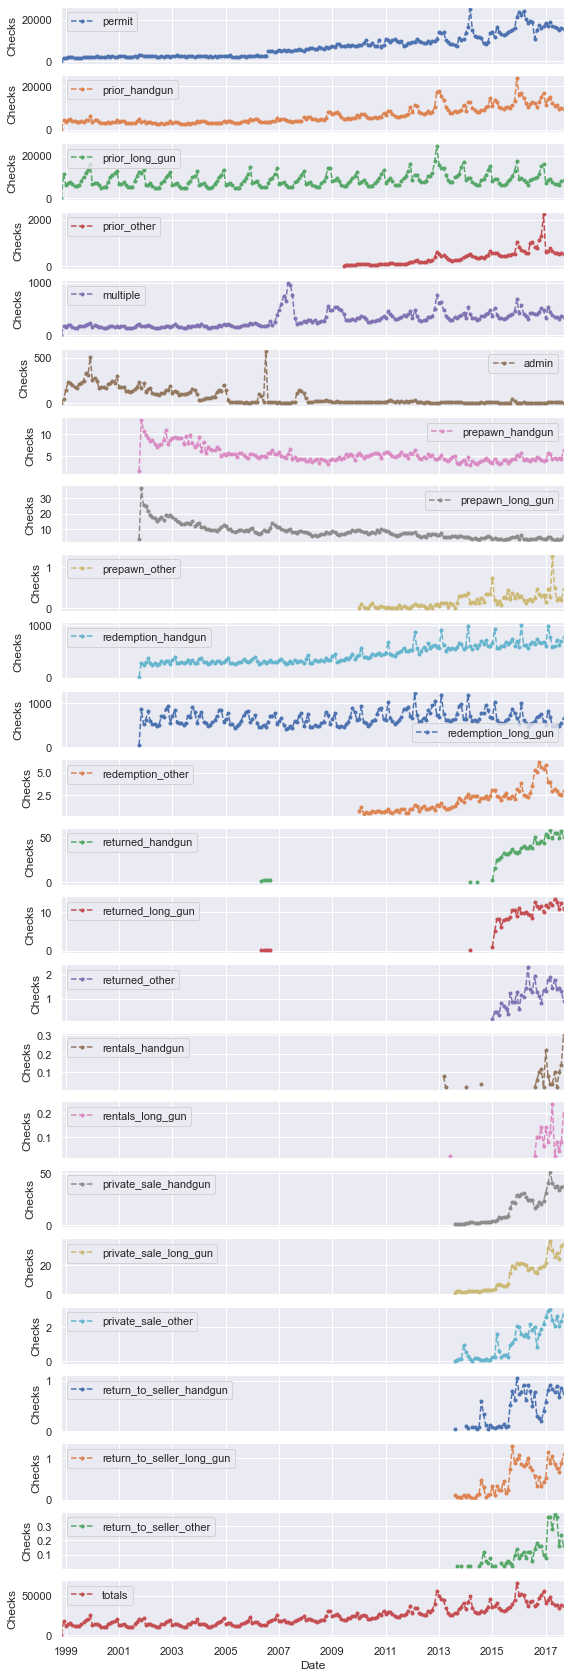

In [1842]:
#Checking every single column.
#Plotting with grouped data to avoid too crowded graphs, since for each month correspond 50 states.

columns=gun_data.columns[1:]
line_graphs(grouped_data,columns)

Although we are still cleaning our dataset, we can already notice signs of seasonality and trend in some of the variables. Unfortunately as many transaction types suffer heavily from missing data we will not be able to do direct comparisons between them.

However we may still be able to compare gun types where this is possible as the missing data show greater correlation along transaction types than along gun types as we saw in the heatmap earlier on.

We will now just interpolate the missing data, which will fill the empty periods with zeros.

In [1843]:
gun_data.interpolate(method='time',inplace=True)

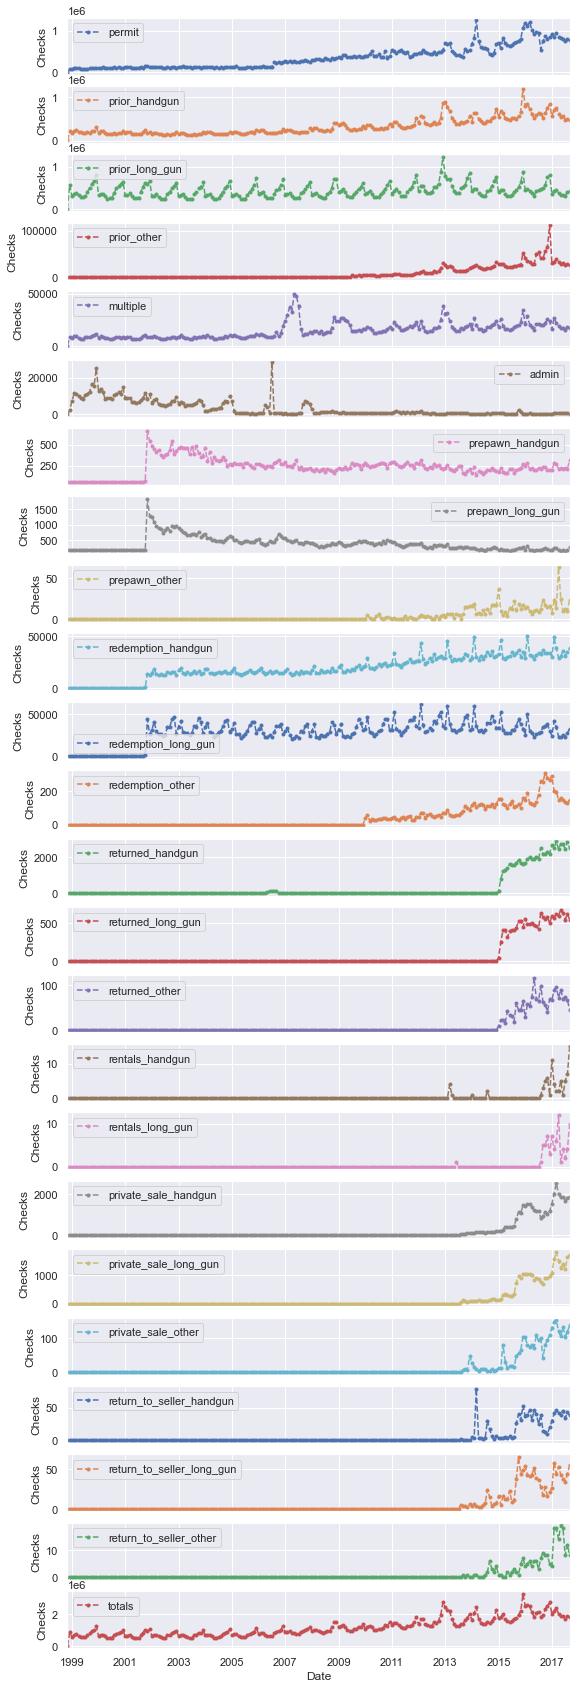

In [1844]:
line_graphs(gun_data.groupby('Date').sum(),columns)

<AxesSubplot:>

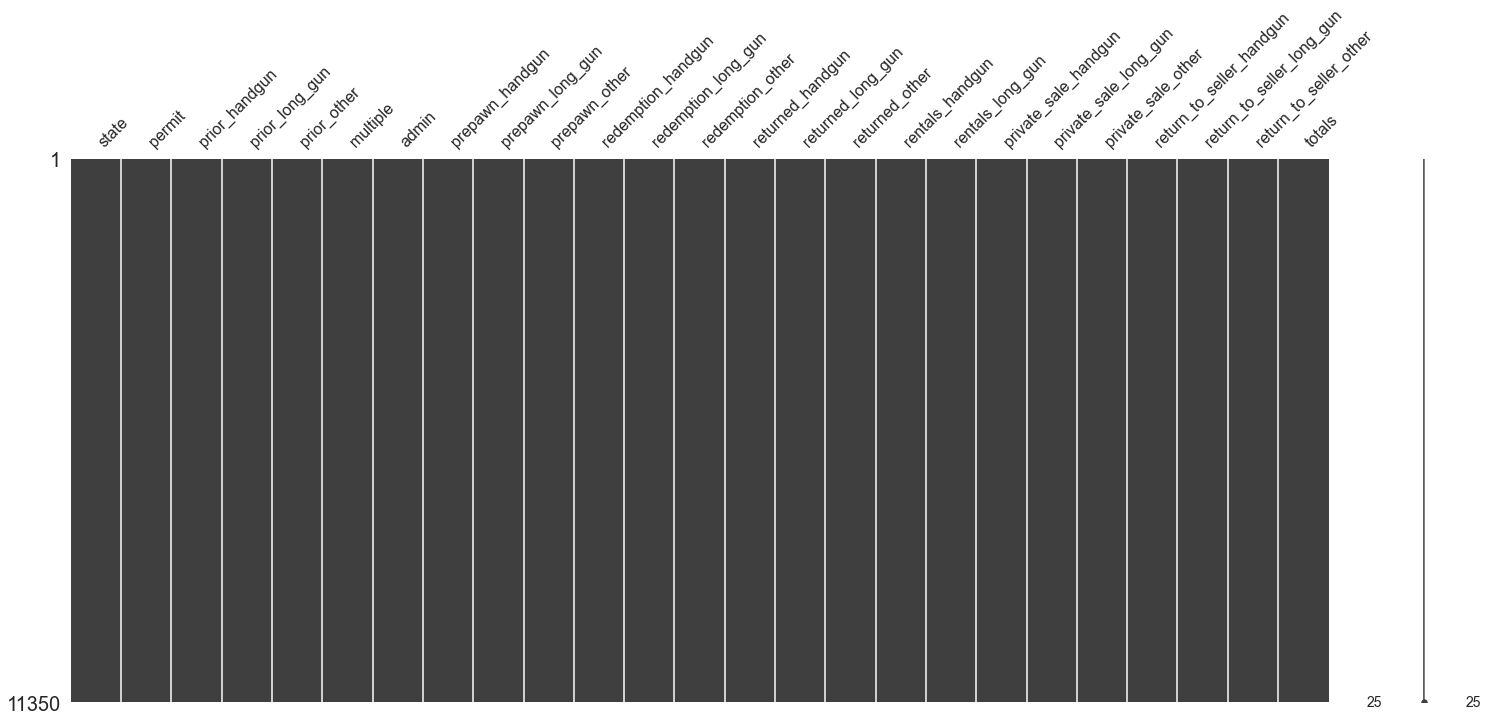

In [1845]:
#All missing values are filled

mno.matrix(gun_data)

As we intend to compare gun types later on, we will create total columns for each gun type across all transaction batches.

In [1846]:
guns=['handgun','long_gun','other']
for gun in guns:
    totals=[]
    for column in gun_data.columns:
        if gun in column:
            totals.append(column)
    gun_data['total_'+gun]=gun_data[totals[0]]+gun_data[totals[1]]+gun_data[totals[2]]

In [1847]:
gun_data.head()

,state,permit,prior_handgun,prior_long_gun,prior_other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_handgun,total_long_gun,total_other
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,...,9.0,16.0,3.0,0.0,0.0,3.0,32019,7127.0,7603.0,224.0
2017-09-01,Alaska,209.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,...,17.0,24.0,1.0,0.0,0.0,0.0,6303,2525.0,3086.0,221.0
2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,...,38.0,12.0,2.0,0.0,0.0,0.0,28394,12550.0,8700.0,923.0
2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,...,13.0,23.0,0.0,0.0,2.0,1.0,17747,5655.0,7900.0,169.0
2017-09-01,California,57839.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,123506,37700.0,24978.0,2989.0


As a final step we will create two grouped dataframes, by Date and by State that should make our comparisons easier later.

In [1848]:
#our dataset grouped by date

grouped_date=gun_data.groupby('Date').sum()

In [1849]:
grouped_date.head()

,permit,prior_handgun,prior_long_gun,prior_other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_handgun,total_long_gun,total_other
Date,,,,,,,,,,,,,,,,,,,,,
1998-11-01,2073.0,6858.0,11908.0,100.0,275,60.0,50.0,200.0,0.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21174,7258.0,12808.0,100.0
1998-12-01,76096.0,212737.0,570774.0,100.0,8436,2159.0,50.0,200.0,0.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,870202,213137.0,571674.0,100.0
1999-01-01,77072.0,184192.0,309818.0,100.0,7494,6993.0,50.0,200.0,0.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,585569,184592.0,310718.0,100.0
1999-02-01,84759.0,232172.0,352344.0,100.0,9221,11371.0,50.0,200.0,0.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,689867,232572.0,353244.0,100.0
1999-03-01,103185.0,240680.0,376686.0,100.0,9529,11154.0,50.0,200.0,0.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,741234,241080.0,377586.0,100.0


In [1850]:
#our dataset grouped by state

grouped_state=gun_data.groupby('state').sum()
grouped_state.head()

,permit,prior_handgun,prior_long_gun,prior_other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_handgun,total_long_gun,total_other
state,,,,,,,,,,,,,,,,,,,,,
Alabama,1047441.0,2222037.0,2626029.0,39832.0,105230,32.0,4274.0,6483.0,26.0,304651.0,...,224.0,207.0,19.0,15.576271,12.0,6.0,6706079,2530962.0,2982072.0,40274.0
Alaska,13352.0,434602.0,572174.0,16224.0,28904,19.0,1078.0,1603.0,1.0,31385.0,...,196.0,245.0,10.0,4.576271,6.0,1.0,1137643,467065.0,611721.0,16313.0
Arizona,710509.0,1781468.0,1480762.0,57086.0,84979,6643.0,1447.0,1050.0,18.0,178675.0,...,300.0,189.0,37.0,22.576271,16.0,3.0,4425714,1961590.0,1595478.0,57398.0
Arkansas,507951.0,965584.0,1663256.0,13307.0,61919,2146.0,1637.0,4135.0,12.0,150440.0,...,199.0,215.0,16.0,13.576271,13.0,4.0,3752633,1117661.0,2036574.0,13492.0
California,6530543.0,5910880.0,5936770.0,342889.0,207864,16680.0,35.0,140.0,0.0,37109.0,...,0.0,0.0,0.0,1.576271,0.0,0.0,19014063,5948024.0,5968682.0,343434.0


<a id='wrangling2'></a>
##  Data Wrangling - Second Data set - Census Data

Now we will start dealing with the second dataset and clean it as best as we can in order to be able to use it to draw insights at a later stage.

In [1851]:
census_data=pd.read_csv('U.S. Census Data.csv')

In [1852]:
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [1853]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [1854]:
#We will transpose our data so that each row will correspond to one of the 50 states

In [1855]:
T=census_data.transpose()

In [1856]:
T.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1857]:
#We will put the Fact row as header and delete the Fact & Fact Note rows as we do not need them

In [1858]:
T.rename(columns=T.iloc[0],inplace=True)
T.drop('Fact',axis=0,inplace=True)

In [1859]:
T.drop('Fact Note',axis=0,inplace=True)

In [1860]:
#dropping potential rows or columns where all values are NAs
T.dropna(axis=1,how='all',inplace=True)
T.dropna(axis=0,how='all',inplace=True)

In [1861]:
T.head(10)

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,10.70%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


In [1862]:
#Next we will proceed by dropping the column "FIPS Code" as we do not need the code to find potential relations
#with the gun_data set

T.drop("FIPS Code",axis=1,inplace=True)

In [1863]:
T.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


In [1864]:
#We will now define a cleaning function that will replace every value with a float. Else it returns a NaN

def to_float(x):
    try:
        return float(x)
    except:
        if '%' in x:
            return float(x.strip('%'))/100
        elif ',' in x:
            try:
                return float(x.replace(',',''))
            except:
                if '$' in x:
                    x=x.strip('$')
                    return float(x.replace(',',''))
        else:
            try:
                return int(x)
            except:
                return np.nan

In [1865]:
#applying the function to every element in the dataframe

T=T.applymap(to_float)

In [1866]:
T.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,4863300.0,4780131.0,0.017,4779736.0,0.060,0.064,0.226,0.237,0.161,0.138,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33
Alaska,741894.0,710249.0,0.045,710231.0,0.073,0.076,0.252,0.264,0.104,0.077,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95
Arizona,6931071.0,6392301.0,0.084,6392017.0,0.063,0.071,0.235,0.255,0.169,0.138,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08
Arkansas,2988248.0,2916025.0,0.025,2915918.0,0.064,0.068,0.236,0.244,0.163,0.144,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48
California,39250017.0,37254522.0,0.054,37253956.0,0.063,0.068,0.232,0.250,0.136,0.114,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22


In [1867]:
#Checking

T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 64 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     float64
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     float64
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 3   Population, Census, April 1, 2010                                                       50 non-null     float64
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     float64
 5   Persons under 5 years, percent, April 1, 2010                      

In [1868]:
#Looks like several values that could not be converted to floats have been replaced with NaNs

T.isna().sum().sum()

71

In [1869]:
#We will now create a function to replace the NaN values with the mean of each feature

def fill(x):
    mean=x.mean()
    x.fillna(mean,inplace=True)
    return x
    

In [1870]:
#Applying the filling function to every column

T=T.apply(fill,axis=1)

In [1871]:
T.isna().sum().sum()

0

In [1872]:
T.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,4863300.0,4780131.0,0.017,4779736.0,0.060,0.064,0.226,0.237,0.161,0.138,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33
Alaska,741894.0,710249.0,0.045,710231.0,0.073,0.076,0.252,0.264,0.104,0.077,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95
Arizona,6931071.0,6392301.0,0.084,6392017.0,0.063,0.071,0.235,0.255,0.169,0.138,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08
Arkansas,2988248.0,2916025.0,0.025,2915918.0,0.064,0.068,0.236,0.244,0.163,0.144,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48
California,39250017.0,37254522.0,0.054,37253956.0,0.063,0.068,0.232,0.250,0.136,0.114,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22


As the columns may refer to different years, we will extract the columns that refer to the same year and batch them together in separate dataframes.

In [1873]:
#Finding the years that the census data refer to

nums=T.columns.str.extract('(\d+)')
years=[]
for num in nums[0]:
    if len(str(num))==4 and (num not in years):
        years.append(num)
print(years)

['2011', '2016', '2012', '2015', '2014', '2010']


In [1874]:
#Creating a function that makes list of dataframes with year-specific columns

def frames(x):
    years=['2010','2011','2012','2014','2015','2016']
    list_of_dfs=[]
    for year in years:
        columns=[]
        for column in x.columns:
            if year in column:
                columns.append(column)
        list_of_dfs.append(x[columns])
    return list_of_dfs
        
        
    

In [1875]:
#Assigning the new data frames to the variables below

census2010=frames(T)[0]
census2011=frames(T)[1]
census2012=frames(T)[2]
census2014=frames(T)[3]
census2015=frames(T)[4]
census2016=frames(T)[5]

In [1876]:
#Now in each variable we have a census dataframe with features relevant to a specific date.
#For example for the census2016 we have all the features that have something to do with 2016

census2016.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,4863300.0,4780131.0,0.017,0.060,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,2230185.0,15001.0
Alaska,741894.0,710249.0,0.045,0.073,0.252,0.104,0.477,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,310658.0,1503.0
Arizona,6931071.0,6392301.0,0.084,0.063,0.235,0.169,0.503,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,2961003.0,35578.0
Arkansas,2988248.0,2916025.0,0.025,0.064,0.236,0.163,0.509,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729,1354762.0,9474.0
California,39250017.0,37254522.0,0.054,0.063,0.232,0.136,0.503,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,14060525.0,102350.0


In [1877]:
#for 2010. And so on..

census2010.head()

,"Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, April 1, 2010","Housing units, April 1, 2010","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,4780131.0,0.017,4779736.0,0.064,0.237,0.138,0.515,2171853.0,94.4,50645.33
Alaska,710249.0,0.045,710231.0,0.076,0.264,0.077,0.480,306967.0,1.2,570640.95
Arizona,6392301.0,0.084,6392017.0,0.071,0.255,0.138,0.503,2844526.0,56.3,113594.08
Arkansas,2916025.0,0.025,2915918.0,0.068,0.244,0.144,0.509,1316299.0,56.0,52035.48
California,37254522.0,0.054,37253956.0,0.068,0.250,0.114,0.503,13680081.0,239.1,155779.22


In [1878]:
#No NAs
T.isna().sum().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

<a id='question1'></a>
## What is the overall trend of gun purchases? - Addressing Question 1

In [1879]:
#The grouped gun data sets

grouped_date.head()

,permit,prior_handgun,prior_long_gun,prior_other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_handgun,total_long_gun,total_other
Date,,,,,,,,,,,,,,,,,,,,,
1998-11-01,2073.0,6858.0,11908.0,100.0,275,60.0,50.0,200.0,0.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21174,7258.0,12808.0,100.0
1998-12-01,76096.0,212737.0,570774.0,100.0,8436,2159.0,50.0,200.0,0.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,870202,213137.0,571674.0,100.0
1999-01-01,77072.0,184192.0,309818.0,100.0,7494,6993.0,50.0,200.0,0.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,585569,184592.0,310718.0,100.0
1999-02-01,84759.0,232172.0,352344.0,100.0,9221,11371.0,50.0,200.0,0.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,689867,232572.0,353244.0,100.0
1999-03-01,103185.0,240680.0,376686.0,100.0,9529,11154.0,50.0,200.0,0.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,741234,241080.0,377586.0,100.0


In order to extract conclusions about the overall trend and seasonality through the years, we will make use of the 'Total' column, then plot the rolling average and standard deviation on the same graph. We will then remove the trend to further explore the seasonality patterns.

In [1880]:
#standardizing to remove the trend

gd_totals_std= (grouped_date.totals - grouped_date.totals.rolling(window=12).mean()) / grouped_date.totals.rolling(window=12).std()

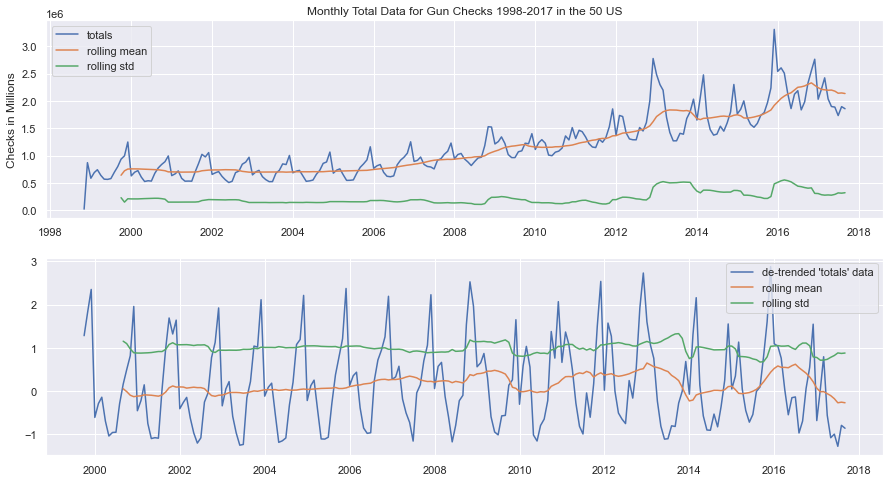

In [1881]:
#Exploring trend and seasonality via the rolling mean

fig, ax = plt.subplots(2,figsize=(15, 8))
ax[0].plot(grouped_date.index, grouped_date.totals, label='totals')
ax[0].plot(grouped_date.totals.rolling(window=12).mean(), label="rolling mean");
ax[0].plot(grouped_date.totals.rolling(window=12).std(), label="rolling std");
ax[0].set_title('Monthly Total Data for Gun Checks 1998-2017 in the 50 US')
ax[0].set_ylabel('Checks in Millions')
ax[0].legend()

ax[1].plot(gd_totals_std.index, gd_totals_std, label="de-trended 'totals' data")
ax[1].plot(gd_totals_std.rolling(window=12).mean(), label="rolling mean");
ax[1].plot(gd_totals_std.rolling(window=12).std(), label="rolling std");
ax[1].legend();

In the first graph above we are able to see an upwards trend of the total firearm check data from 1998 to 2018. This trend however could be explained due to the fact that a lot of data for the earlier years are missing.

By removing the trend, we are in position to clearly tell the seasonality in our time series.
Although we can infer approximately the months from this graph, in order to be absolutely certain about the nature of our seasonality, we will create a new 'Month' column and recheck the seasonality with boxplots on the 'Total' columns.
We will also a create a 'Year' column to further explore the trend below.


In [1882]:
# Creating functions to extract Month and Year

def extract_month(x):
    x['date']=x.index
    x['Month']=x['date'].dt.month

def extract_year(x):
    x['date']=x.index
    x['Year']=x['date'].dt.year

In [1883]:
extract_month(grouped_date)
extract_year(grouped_date)

In [1884]:
#defining  boxplot functions for both Month and Year

def boxplots(df,cols):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(11, 12))
    for name, ax in zip(cols, axes):
        sns.boxplot(data=df, x='Month', y=name, ax=ax)
        ax.set_title(name)
        ax.set_ylabel('Checks in Millions')
    plt.subplots_adjust(hspace=0.4)
        
def boxplots_years(df,cols):
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(11, 16))
    for name, ax in zip(cols, axes):
        sns.boxplot(data=df, x='Year', y=name, ax=ax)
        ax.set_title(name)
        ax.set_ylabel('Checks in Millions')
    plt.subplots_adjust(hspace=0.4)
    

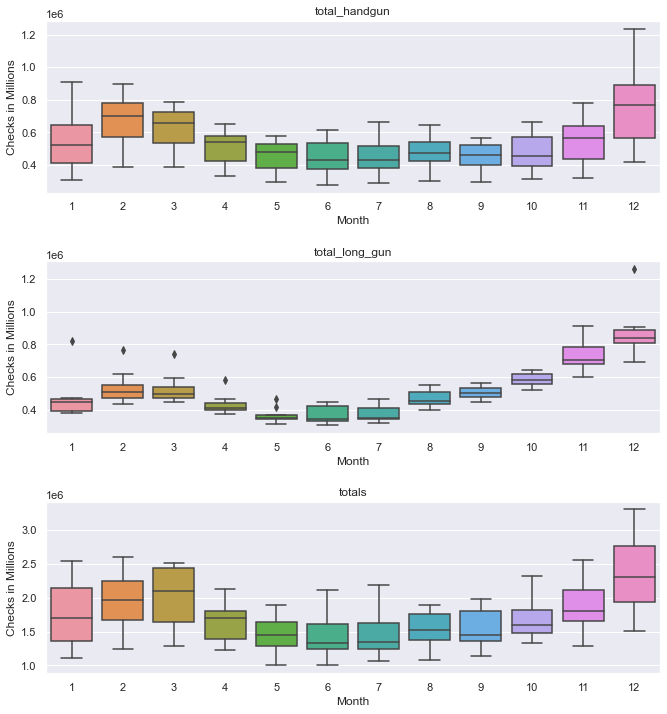

In [1885]:
#Checking for the periods 2010-2017 on the 'total' columns which had the least the missing values (handgun,longgun)

boxplots(grouped_date.loc['2010-01-01':'2017-09-01'],['total_handgun','total_long_gun','totals'])

As is now evident, the number of firearms are significantly increased during Winter, and decreased during the Summer season.

The underlying reasons behind this observation are unknown to us and are out of scope of this analysis. However, we could keep in mind factors such as the hunting season, the Christmas Holidays or the Autumn sales if one wants to explore further a potential causal relationship. As we can see, the checks are gradually increasing from Autumn and peak in December. 

Now we will proceed by doing the same for the years and check the total trend year by year.

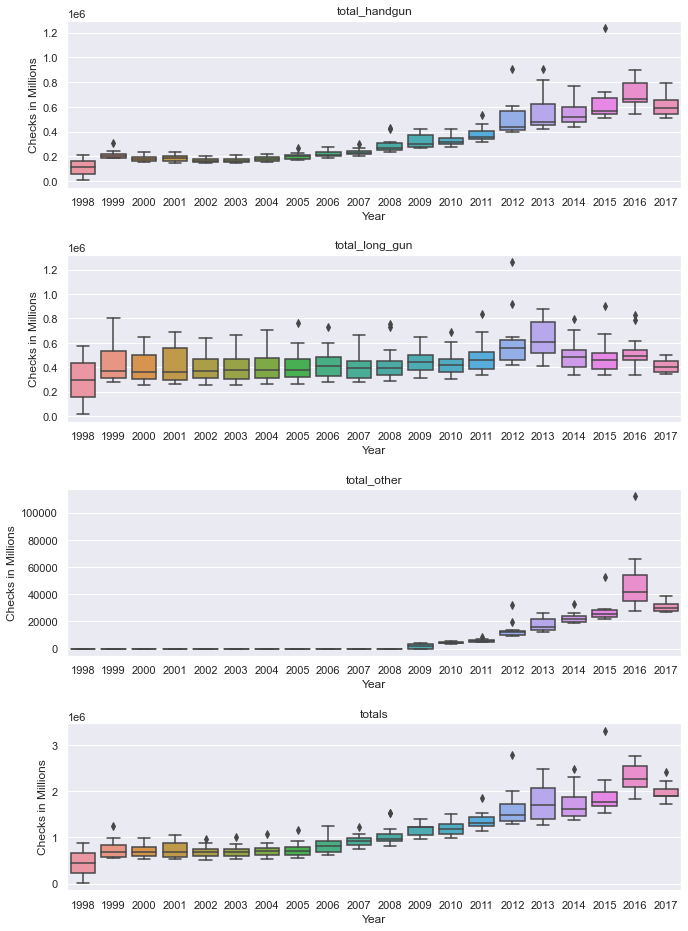

In [1886]:
boxplots_years(grouped_date,['total_handgun','total_long_gun','total_other','totals'])

As we can see, the handguns show a clear upwards trend through the years. The long_guns on the other hand do not show drastic changes. The 'other' types of guns show an upwards slope from 2009 to 2017 but there's no available data before that.

The 'Total' columns shows an upwards trend as well but could again be explained due to the fact that a lot of data are missing for the earlier years.

<a id='question2'></a>
## How do types of guns and transactions compare with each other? - Question 2

As we show earlier during the cleaning phase, a lot of data are missing for most of the transactions, so doing a direct comparison between them wouldn't be fair and would likely lead us to wrong conclusions.

However, we are still able to compare the gun types for the period 2010-2017 where the 'other' type of guns have available data.
We will begin by checking the trend for these guns and for that reason we will have to standardize them.

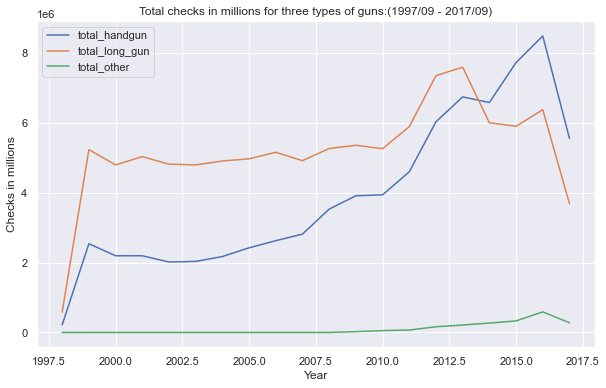

In [1887]:
#grouping by year

grouped_date.groupby('Year').sum()[['total_handgun','total_long_gun','total_other']].plot()
plt.title('Total checks in millions for three types of guns:(1997/09 - 2017/09)')
plt.ylabel('Checks in millions');

The graph reveals that all three types of guns follow a similar trend in checks that they have caused.
For the handgun and long_gun specifically for which we have data for the full period, we can see that they experience a sharp increase from 1997 to 1999 where the number of gun checks increased from about 1 million to 5 millions and their number kept on gradually rising untill 2013. 

It's worth mentioning that during this year, handguns surpassed long_guns in numbers and took the lead in number of checks.

After undertaking a short decrease to about 6 millions, both lines keep their upwards route untill they peak to about 8.5 and 6.3 millions respectively. From that point on, both the handgun and the long_gun start a downwards course and fall below 6 and 4 millions each.

The upwards and downwards trends can perhaps be observed to the 'other' type of guns as well, but this is not visible in a clear manner due to the difference in scale between the types of guns.

To make sure that all three types of guns follow the same pattern, we will standardize them and compare them during the period 2010-2017 so that we can have full data for the 'other' type of guns as well.


In [1888]:
#defining standardization function

def standardize(x):
    mean=x.mean()
    std=x.std()
    x=(x-mean)/std
    return x

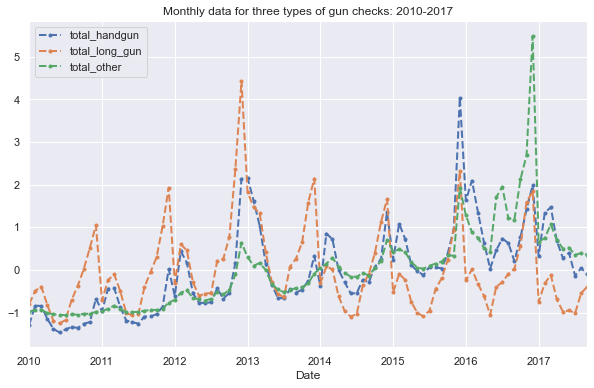

In [1889]:
#Plotting for the period 2010-2017 where we have data for all three types

guns=['total_handgun','total_long_gun','total_other']
for gun in guns:
    line_graph(standardize(grouped_date.loc['2010-01-01':'2017-09-01'][gun]))
plt.title('Monthly data for three types of gun checks: 2010-2017')
plt.legend();

Indeed, it is clearer now that the 'Other' type of guns follow the same pattern in checks as their 'handgun' and 'long_gun' counterparts, although its changes are not always as sharp and often time delayed.

All 3 types of guns show similar trend and seasonality.
We will now proceed by seeing the difference between gun types in absolute numbers for the period 2010-2017

In [1890]:
#grouping by year

grouped_year=grouped_date.groupby('Year').sum()

In [1891]:
grouped_year.head()

,permit,prior_handgun,prior_long_gun,prior_other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,...,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_handgun,total_long_gun,total_other,Month
Year,,,,,,,,,,,,,,,,,,,,,
1998,78169.0,219595.0,582682.0,200.0,8711,2219.0,100.0,400.0,0.0,700.0,...,0.0,0.0,0.0,0.0,0.0,891376,220395.0,584482.0,200.0,23
1999,1037700.0,2532511.0,5216320.0,1200.0,103669,148115.0,600.0,2400.0,0.0,4200.0,...,0.0,0.0,0.0,0.0,0.0,9038315,2537311.0,5227120.0,1200.0,78
2000,1227814.0,2187581.0,4778762.0,1200.0,95681,131648.0,600.0,2400.0,0.0,4200.0,...,0.0,0.0,0.0,0.0,0.0,8421486,2192381.0,4789562.0,1200.0,78
2001,1408338.0,2161166.0,4941982.0,1200.0,96984,100126.0,1724.0,5066.0,0.0,30149.0,...,0.0,0.0,0.0,0.0,0.0,8812457,2193039.0,5025670.0,1200.0,78
2002,1363211.0,1838239.0,4407866.0,1200.0,92892,76776.0,5082.0,11080.0,0.0,171051.0,...,0.0,0.0,0.0,0.0,0.0,8358574,2014372.0,4811428.0,1200.0,78


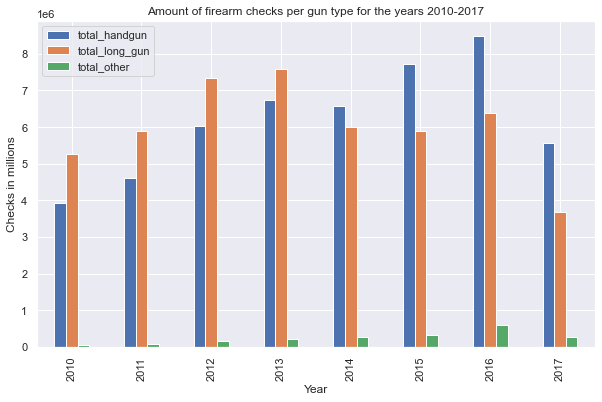

In [1892]:
#comparing for 2010-2017 so as to have full data for all three types of guns

grouped_year.loc['2010':'2017'][['total_handgun','total_long_gun','total_other']].plot(kind='bar')
plt.title('Amount of firearm checks per gun type for the years 2010-2017')
plt.ylabel('Checks in millions');

Our bar plot now verifies what we saw earlier in the line graph. Both handgun and long_gun types show significantly greater check numbers than the 'other' type.

We can also again notice that from 2010 to 2013, long_guns were more popular in firearm checks than handguns. From 2014 however, handguns take the lead and maintain it untill the end of our available data, in 2017.

<a id='question3'></a>
## Which states have had the biggest change in firearm checks? - Question 3

In order to draw meaningful insights about state-specific gun data, we will pick the first and last available years and then group our dataframe per state.

In [1893]:
#Calculating results for 1998, 2017 as well as the total difference and the % change for each state.

values_1998=gun_data.loc['1998'].groupby('state').sum().totals.sort_values(ascending=False)

values_2017=gun_data.query('Date=="2017"').groupby('state').sum().totals.sort_values(ascending=False)

difference=(values_2017-values_1998).sort_values(ascending=False)

percentages=(((values_2017-values_1998)/values_1998)*100).sort_values(ascending=False)

In [1894]:
#Looking into our results

print("States with most checks in 1998:\n",values_1998.nlargest(5))
print("\nStates with most checks in 2017:\n", values_2017.nlargest(5))
print("\nStates with the largest absolute difference:\n",difference.nlargest(5))
print("\nStates with the largest % difference:\n",percentages.nlargest(5))

States with most checks in 1998:
 state
Texas             82399
California        67445
Pennsylvania      48317
Illinois          41477
North Carolina    38943
Name: totals, dtype: int64

States with most checks in 2017:
 state
Kentucky      345924
Illinois      138008
California    130365
Texas         117903
Florida       104576
Name: totals, dtype: int64

States with the largest absolute difference:
 state
Kentucky      314055
Illinois       96531
Minnesota      73206
Florida        72235
California     62920
Name: totals, dtype: int64

States with the largest % difference:
 state
Massachusetts    1285.724186
Georgia          1068.237759
Kentucky          985.456086
Minnesota         604.209310
New Hampshire     394.144144
Name: totals, dtype: float64


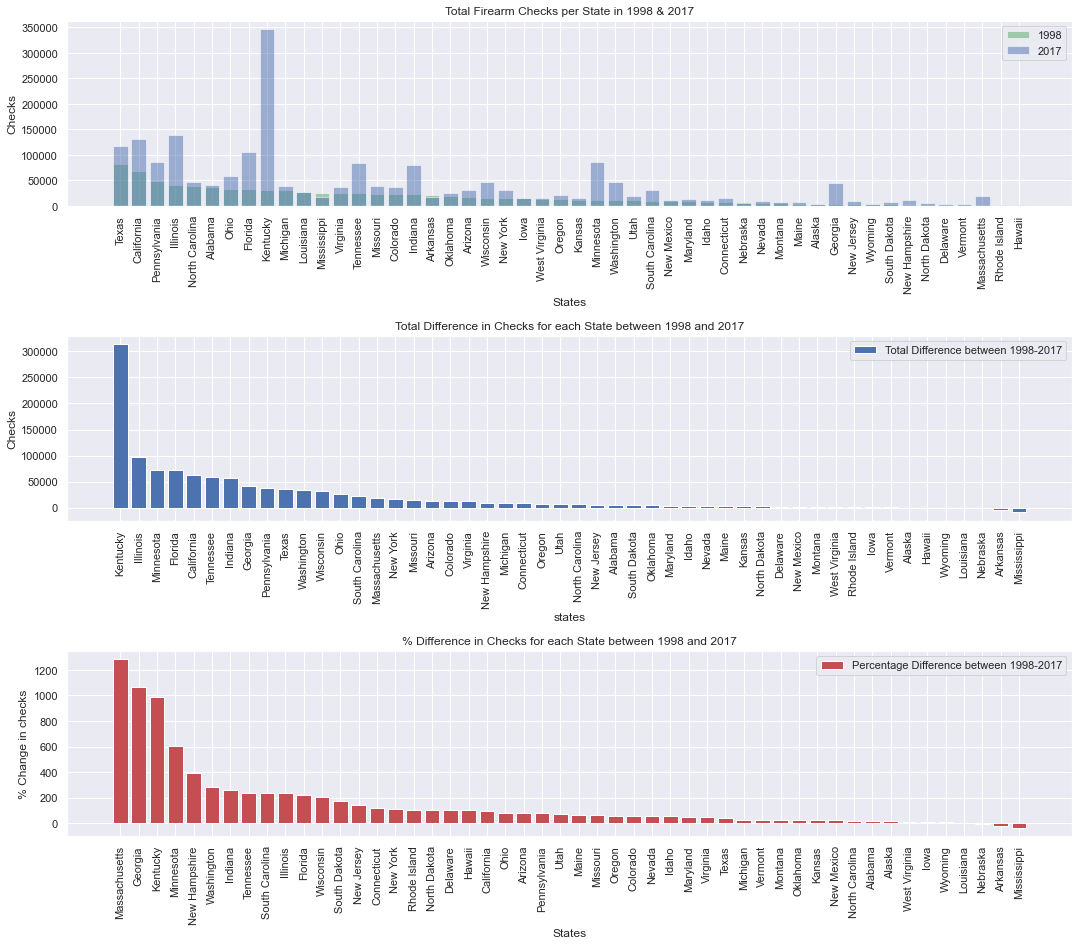

In [1895]:
#Plotting our findings

fig, ax = plt.subplots(3,figsize=(18, 15))

ax[0].bar(x=values_1998.index,height=values_1998,alpha=0.5,color='g',label='1998')
ax[0].bar(x=values_2017.index,height=values_2017,alpha=0.5,color='b',label='2017')
ax[0].set_title('Total Firearm Checks per State in 1998 & 2017')
ax[0].set_ylabel('Checks')
ax[0].set_xlabel('States')
ax[0].tick_params('x',labelrotation=90)
ax[0].legend()


ax[1].bar(x=difference.index,height=difference,label='Total Difference between 1998-2017')
ax[1].set_title('Total Difference in Checks for each State between 1998 and 2017')
ax[1].set_ylabel('Checks')
ax[1].set_xlabel('states')
ax[1].tick_params('x',labelrotation=90)
ax[1].legend()

ax[2].bar(x=percentages.index,height=percentages,color='r',label='Percentage Difference between 1998-2017')
ax[2].set_title('% Difference in Checks for each State between 1998 and 2017')
ax[2].set_ylabel('% Change in checks')
ax[2].set_xlabel('States')
ax[2].tick_params('x',labelrotation=90)
ax[2].legend()

plt.subplots_adjust(hspace=0.7)

**As we can see from the graphs above, in 1998, the first states with the most gun checks were**
- Texas             82399
- California        67445
- Pennsylvania      48317
- Illinois          41477
- North Carolina    38943

**In 2017 however, the states with the most checks were:**

- Kentucky      345924
- Illinois      138008
- California    130365
- Texas         117903
- Florida       104576

**The states that experienced the largest nominal changes between 1998 and 2017 were:**

- Kentucky      314055
- Illinois       96531
- Minnesota      73206
- Florida        72235
- California     62920

**The states that experienced the largest % change between 1998 and 2017 were:**
- Massachusetts    1285.724186%
- Georgia          1068.237759%
- Kentucky          985.456086%
- Minnesota         604.209310%
- New Hampshire     394.144144%

<a id='question4'></a>
## What's the percentage contribution of each state to the yearly gun checks? - Question 4

In order to tackle this question, we will first find the total checks per year across the US. Then we will be able to caclulate the percentage that each state contributed to each year by dividing each date & state data point with the total.

Before that, we will have to create a multi-indexed dataframe with year and state, as well as create a Year column and convert it into a datetime object to take advantage of its extra abilities.

In [1896]:
#We will make use of the extract_year() function that we defined earlier

extract_year(gun_data)

In [1897]:
gun_data.head()

,state,permit,prior_handgun,prior_long_gun,prior_other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_handgun,total_long_gun,total_other,date,Year
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,...,3.0,0.0,0.0,3.0,32019,7127.0,7603.0,224.0,2017-09-01,2017
2017-09-01,Alaska,209.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,...,1.0,0.0,0.0,0.0,6303,2525.0,3086.0,221.0,2017-09-01,2017
2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,...,2.0,0.0,0.0,0.0,28394,12550.0,8700.0,923.0,2017-09-01,2017
2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,...,0.0,0.0,2.0,1.0,17747,5655.0,7900.0,169.0,2017-09-01,2017
2017-09-01,California,57839.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,123506,37700.0,24978.0,2989.0,2017-09-01,2017


In [1898]:
#Converting year to datetime

gun_data['Year']=pd.to_datetime(gun_data['Year'],format='%Y')

In [1899]:
#Creating a df grouped by both Year and state

grouped_year_state=gun_data.groupby(['Year','state']).sum()
grouped_year_state.head()

permit  prior_handgun  prior_long_gun  prior_other  \
Year       state                                                            
1998-01-01 Alabama        0.0        10567.0         25723.0          4.0   
           Alaska         4.0         1365.0          2555.0          4.0   
           Arizona     1733.0         7157.0          8275.0          4.0   
           Arkansas       0.0         4649.0         16914.0          4.0   
           California  5366.0        28641.0         33438.0          4.0   

                       multiple  admin  prepawn_handgun  prepawn_long_gun  \
Year       state                                                            
1998-01-01 Alabama          278    0.0              2.0               8.0   
           Alaska            61    0.0              2.0               8.0   
           Arizona          278   10.0              2.0               8.0   
           Arkansas         189    0.0              2.0               8.0   
           California         0    0.0              2.0               8.0   

                       prepawn_other  redemption_handgun  ...  \
Year       state                                          ...   
1998-01-01 Alabama               0.0                14.0  ...   
           Alaska                0.0                14.0  ...   
           Arizona               0.0                14.0  ...   
           Arkansas              0.0                14.0  ...   
           California            0.0                14.0  ...   

                       private_sale_handgun  private_sale_long_gun  \
Year       state                                                     
1998-01-01 Alabama                      0.0                    0.0   
           Alaska                       0.0                    0.0   
           Arizona                      0.0                    0.0   
           Arkansas                     0.0                    0.0   
           California                   0.0                    0.0   

                       private_sale_other  return_to_seller_handgun  \
Year       state                                                      
1998-01-01 Alabama                    0.0                       0.0   
           Alaska                     0.0                       0.0   
           Arizona                    0.0                       0.0   
           Arkansas                   0.0                       0.0   
           California                 0.0                       0.0   

                       return_to_seller_long_gun  return_to_seller_other  \
Year       state                                                           
1998-01-01 Alabama                           0.0                     0.0   
           Alaska                            0.0                     0.0   
           Arizona                           0.0                     0.0   
           Arkansas                          0.0                     0.0   
           California                        0.0                     0.0   

                       totals  total_handgun  total_long_gun  total_other  
Year       state                                                           
1998-01-01 Alabama      36568        10583.0         25759.0          4.0  
           Alaska        3985         1381.0          2591.0          4.0  
           Arizona      17453         7173.0          8311.0          4.0  
           Arkansas     21752         4665.0         16950.0          4.0  
           California   67445        28657.0         33474.0          4.0  

[5 rows x 27 columns]

In [1900]:
#Now we will create another dataframe where our data will be grouped only by year

grouped_years=gun_data.groupby('Year').sum()
grouped_years.head(10)

,permit,prior_handgun,prior_long_gun,prior_other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,total_handgun,total_long_gun,total_other
Year,,,,,,,,,,,,,,,,,,,,,
1998-01-01,78169.0,219595.0,582682.0,200.0,8711,2219.0,100.0,400.0,0.0,700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,891376,220395.0,584482.0,200.0
1999-01-01,1037700.0,2532511.0,5216320.0,1200.0,103669,148115.0,600.0,2400.0,0.0,4200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9038315,2537311.0,5227120.0,1200.0
2000-01-01,1227814.0,2187581.0,4778762.0,1200.0,95681,131648.0,600.0,2400.0,0.0,4200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8421486,2192381.0,4789562.0,1200.0
2001-01-01,1408338.0,2161166.0,4941982.0,1200.0,96984,100126.0,1724.0,5066.0,0.0,30149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8812457,2193039.0,5025670.0,1200.0
2002-01-01,1363211.0,1838239.0,4407866.0,1200.0,92892,76776.0,5082.0,11080.0,0.0,171051.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8358574,2014372.0,4811428.0,1200.0
2003-01-01,1403496.0,1844597.0,4381438.0,1200.0,99034,69946.0,5146.0,8656.0,0.0,181927.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8393942,2031670.0,4789796.0,1200.0
2004-01-01,1345672.0,1984064.0,4505326.0,1200.0,101737,51559.0,3943.0,6459.0,0.0,182539.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8571726,2170546.0,4902212.0,1200.0
2005-01-01,1350193.0,2234171.0,4582776.0,1200.0,109549,13158.0,3151.0,5782.0,0.0,183116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8857599,2420438.0,4964261.0,1200.0
2006-01-01,2036789.0,2434038.0,4787683.0,1200.0,129897,41792.0,3146.0,5917.0,0.0,186385.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9982755,2623569.0,5150447.0,1200.0


In [1901]:
#Calculating yearly totals

totals_per_year=grouped_years.groupby('Year',sort=False).sum().totals
totals_per_year

Year
1998-01-01      891376
1999-01-01     9038315
2000-01-01     8421486
2001-01-01     8812457
2002-01-01     8358574
2003-01-01     8393942
2004-01-01     8571726
2005-01-01     8857599
2006-01-01     9982755
2007-01-01    11151998
2008-01-01    12684240
2009-01-01    13974323
2010-01-01    14309926
2011-01-01    16323039
2012-01-01    19446504
2013-01-01    20946761
2014-01-01    20840268
2015-01-01    23006228
2016-01-01    27405549
2017-01-01    17974940
Name: totals, dtype: int64

In [1902]:
#Now we can create a new column to the grouped data set, as a percentage by dividing each state's total
#with yearly totals

grouped_year_state['percentage']=grouped_year_state.totals/totals_per_year

In [1903]:
grouped_year_state.head()

permit  prior_handgun  prior_long_gun  prior_other  \
Year       state                                                            
1998-01-01 Alabama        0.0        10567.0         25723.0          4.0   
           Alaska         4.0         1365.0          2555.0          4.0   
           Arizona     1733.0         7157.0          8275.0          4.0   
           Arkansas       0.0         4649.0         16914.0          4.0   
           California  5366.0        28641.0         33438.0          4.0   

                       multiple  admin  prepawn_handgun  prepawn_long_gun  \
Year       state                                                            
1998-01-01 Alabama          278    0.0              2.0               8.0   
           Alaska            61    0.0              2.0               8.0   
           Arizona          278   10.0              2.0               8.0   
           Arkansas         189    0.0              2.0               8.0   
           California         0    0.0              2.0               8.0   

                       prepawn_other  redemption_handgun  ...  \
Year       state                                          ...   
1998-01-01 Alabama               0.0                14.0  ...   
           Alaska                0.0                14.0  ...   
           Arizona               0.0                14.0  ...   
           Arkansas              0.0                14.0  ...   
           California            0.0                14.0  ...   

                       private_sale_long_gun  private_sale_other  \
Year       state                                                   
1998-01-01 Alabama                       0.0                 0.0   
           Alaska                        0.0                 0.0   
           Arizona                       0.0                 0.0   
           Arkansas                      0.0                 0.0   
           California                    0.0                 0.0   

                       return_to_seller_handgun  return_to_seller_long_gun  \
Year       state                                                             
1998-01-01 Alabama                          0.0                        0.0   
           Alaska                           0.0                        0.0   
           Arizona                          0.0                        0.0   
           Arkansas                         0.0                        0.0   
           California                       0.0                        0.0   

                       return_to_seller_other  totals  total_handgun  \
Year       state                                                       
1998-01-01 Alabama                        0.0   36568        10583.0   
           Alaska                         0.0    3985         1381.0   
           Arizona                        0.0   17453         7173.0   
           Arkansas                       0.0   21752         4665.0   
           California                     0.0   67445        28657.0   

                       total_long_gun  total_other  percentage  
Year       state                                                
1998-01-01 Alabama            25759.0          4.0    0.041024  
           Alaska              2591.0          4.0    0.004471  
           Arizona             8311.0          4.0    0.019580  
           Arkansas           16950.0          4.0    0.024403  
           California         33474.0          4.0    0.075664  

[5 rows x 28 columns]

To make sure that we calculated the percentages correctly, we will sum them up per year, which should always equal to 1 as they show each state's participation to the whole.

In [1904]:
grouped_year_state.percentage.groupby('Year').sum()

Year
1998-01-01    1.0
1999-01-01    1.0
2000-01-01    1.0
2001-01-01    1.0
2002-01-01    1.0
2003-01-01    1.0
2004-01-01    1.0
2005-01-01    1.0
2006-01-01    1.0
2007-01-01    1.0
2008-01-01    1.0
2009-01-01    1.0
2010-01-01    1.0
2011-01-01    1.0
2012-01-01    1.0
2013-01-01    1.0
2014-01-01    1.0
2015-01-01    1.0
2016-01-01    1.0
2017-01-01    1.0
Name: percentage, dtype: float64

Nice!

Although earlier we saw the total amount of checks for each state in two specific dates, 1998 and 2017, as well as the % change for each state between these years, we are now able to go a step further and check the % of gun checks performed in each state for any year we wish.

In [1905]:
def plotting_percentages(years):
    
    x_values=grouped_year_state.groupby('state').sum().index
    y_value1=grouped_year_state.loc[years[0]].percentage
    
    
    fig, ax = plt.subplots(1,figsize=(20, 6))
    
    ax.bar(x=x_values,height=y_value1,alpha=0.5,color='g',label=years[0])
    if len(years)>1:
        y_value2=grouped_year_state.loc[years[1]].percentage
        ax.bar(x=x_values,height=y_value2,alpha=0.5,color='r',label=years[1])
    ax.set_title(' Yearly % of Gun checks in Each State')
    ax.set_ylabel('Percentages')
    ax.set_xlabel('States')
    ax.tick_params('x',labelrotation=90)
    ax.legend()

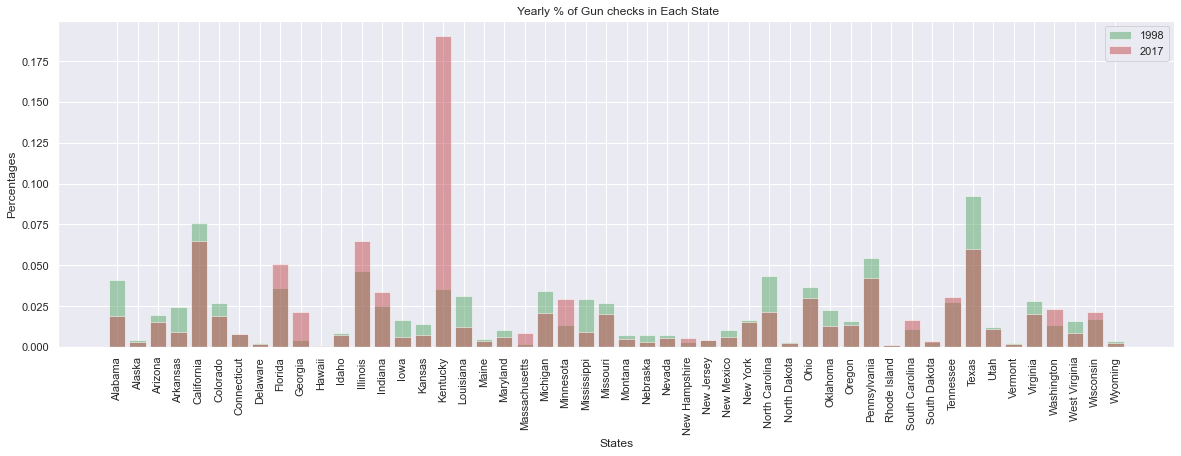

In [1906]:
plotting_percentages(['1998','2017'])

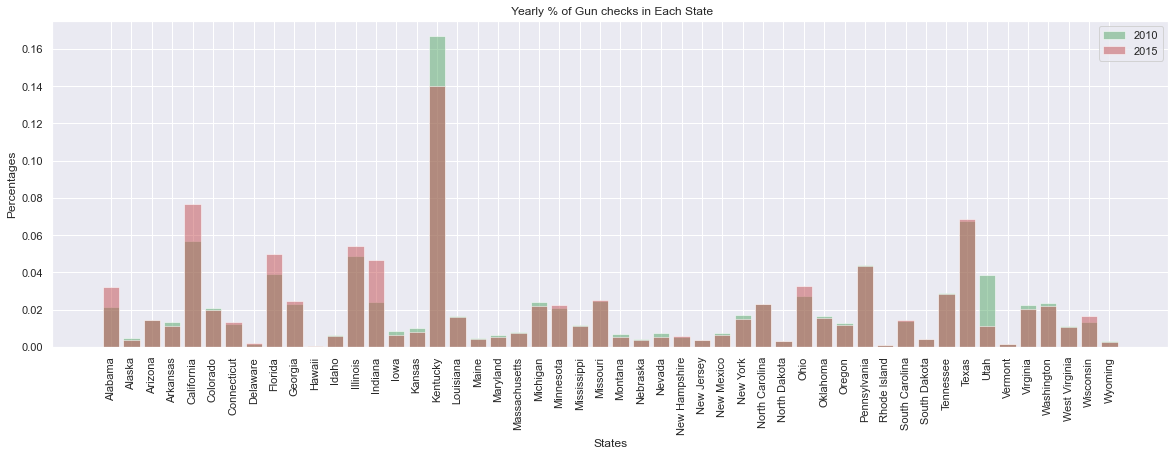

In [1907]:
plotting_percentages(['2010','2015'])

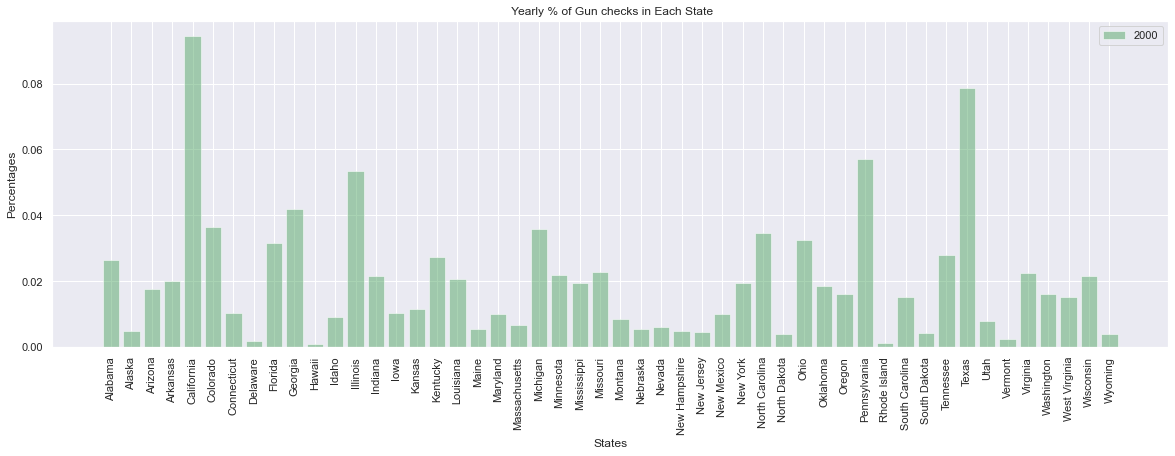

In [1908]:
plotting_percentages(['2000'])

As we can see, in the first bar plot, our results are on par with what we found earlier on. In 1998, Texas, California and Pennsylvania have the greatest % participation to the overall gun checks.
While in 2017, Kentucky, Illinois and California take the lead.

In the second graph, we make comparisons between 2010 and 2015. As we can see, Kentucky still has the greatest contribution in % checks across the US, although its percentages dropped from 2010 to 2015. Similarly, Utah showed great decrease in gun checks between these years.
On the other hand, states like Indiana, California, Alabama and Florida, increased their % gun checks to the whole.

In the last graph, we check the situation in 2000. As is evident, Texas, California and Pennsylvania were still holding strong and maintained the largest % of gun checks across the US.

<a id='5th question'></a>
# Which census data are associated with higher firearm checks? - Question 5

As we saw while we were cleaning the census dataset, it includes information for the 50 US but for a limited time period. It also includes 65 features, some if not most of which may not be relevant to our case.

For the shake of the simplicity of the analysis, we will examine a couple of targeted features of the population data to see if there's any potential relation with the amount of gun checks performed per state.

**It must be noted however, that those results are tentative and we are not in position to prove or to safely come to a conclusion solely based on those relations.**

In [1909]:
#As the census is all about state-specific data on selected years, we will also use our grouped_year_state dataset

grouped_year_state.head()

permit  prior_handgun  prior_long_gun  prior_other  \
Year       state                                                            
1998-01-01 Alabama        0.0        10567.0         25723.0          4.0   
           Alaska         4.0         1365.0          2555.0          4.0   
           Arizona     1733.0         7157.0          8275.0          4.0   
           Arkansas       0.0         4649.0         16914.0          4.0   
           California  5366.0        28641.0         33438.0          4.0   

                       multiple  admin  prepawn_handgun  prepawn_long_gun  \
Year       state                                                            
1998-01-01 Alabama          278    0.0              2.0               8.0   
           Alaska            61    0.0              2.0               8.0   
           Arizona          278   10.0              2.0               8.0   
           Arkansas         189    0.0              2.0               8.0   
           California         0    0.0              2.0               8.0   

                       prepawn_other  redemption_handgun  ...  \
Year       state                                          ...   
1998-01-01 Alabama               0.0                14.0  ...   
           Alaska                0.0                14.0  ...   
           Arizona               0.0                14.0  ...   
           Arkansas              0.0                14.0  ...   
           California            0.0                14.0  ...   

                       private_sale_long_gun  private_sale_other  \
Year       state                                                   
1998-01-01 Alabama                       0.0                 0.0   
           Alaska                        0.0                 0.0   
           Arizona                       0.0                 0.0   
           Arkansas                      0.0                 0.0   
           California                    0.0                 0.0   

                       return_to_seller_handgun  return_to_seller_long_gun  \
Year       state                                                             
1998-01-01 Alabama                          0.0                        0.0   
           Alaska                           0.0                        0.0   
           Arizona                          0.0                        0.0   
           Arkansas                         0.0                        0.0   
           California                       0.0                        0.0   

                       return_to_seller_other  totals  total_handgun  \
Year       state                                                       
1998-01-01 Alabama                        0.0   36568        10583.0   
           Alaska                         0.0    3985         1381.0   
           Arizona                        0.0   17453         7173.0   
           Arkansas                       0.0   21752         4665.0   
           California                     0.0   67445        28657.0   

                       total_long_gun  total_other  percentage  
Year       state                                                
1998-01-01 Alabama            25759.0          4.0    0.041024  
           Alaska              2591.0          4.0    0.004471  
           Arizona             8311.0          4.0    0.019580  
           Arkansas           16950.0          4.0    0.024403  
           California         33474.0          4.0    0.075664  

[5 rows x 28 columns]

In [1910]:
#Taking a look at the available features once again

T.columns

Index(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

<a id='5th question2'></a>
### 2 Questions that will talk about:

Looks like several perhaps relevant data like population estimates, age, sex and ethnicity are only available for the year 2016.

For that reason, we will make use of our census2016 dataframe that we created earlier and attempt to answer these questions:

- Is there any relation between the amount of firearm checks performed by each state in 2016 with the population estimates?
- Do specific racial groups have anything to do with higher gun check percentages?

In [1911]:
census2016.shape

(50, 17)

In [1912]:
census2016.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Building permits, 2016"
Alabama,4863300.0,4780131.0,0.017,0.060,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,2230185.0,15001.0
Alaska,741894.0,710249.0,0.045,0.073,0.252,0.104,0.477,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,310658.0,1503.0
Arizona,6931071.0,6392301.0,0.084,0.063,0.235,0.169,0.503,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,2961003.0,35578.0
Arkansas,2988248.0,2916025.0,0.025,0.064,0.236,0.163,0.509,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729,1354762.0,9474.0
California,39250017.0,37254522.0,0.054,0.063,0.232,0.136,0.503,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,14060525.0,102350.0


In [1913]:
#We will also make use of the grouped_year_state dataframe for 2016

grouped_year_state_2016=grouped_year_state.loc['2016']
grouped_year_state_2016.head()

permit  prior_handgun  prior_long_gun  prior_other  \
Year       state                                                               
2016-01-01 Alabama      291039.0       153123.0        121963.0       6104.0   
           Alaska         3121.0        37491.0         36887.0       2889.0   
           Arizona       87771.0       166784.0        108988.0      13122.0   
           Arkansas      55456.0        80244.0         82120.0       3059.0   
           California  1036981.0       560355.0        554550.0     211707.0   

                       multiple  admin  prepawn_handgun  prepawn_long_gun  \
Year       state                                                            
2016-01-01 Alabama         6545    5.0            111.0             114.0   
           Alaska          2316    0.0             84.0              70.0   
           Arizona         7908    0.0             74.0              60.0   
           Arkansas        4400  143.0             77.0             116.0   
           California         0    0.0              0.0               0.0   

                       prepawn_other  redemption_handgun  ...  \
Year       state                                          ...   
2016-01-01 Alabama               2.0             20036.0  ...   
           Alaska                0.0              2234.0  ...   
           Arizona               3.0             16576.0  ...   
           Arkansas              3.0             12645.0  ...   
           California            0.0              6752.0  ...   

                       private_sale_long_gun  private_sale_other  \
Year       state                                                   
2016-01-01 Alabama                      65.0                 4.0   
           Alaska                       66.0                 1.0   
           Arizona                      56.0                11.0   
           Arkansas                     64.0                 6.0   
           California                    0.0                 0.0   

                       return_to_seller_handgun  return_to_seller_long_gun  \
Year       state                                                             
2016-01-01 Alabama                          3.0                        2.0   
           Alaska                           2.0                        3.0   
           Arizona                         11.0                       11.0   
           Arkansas                         7.0                        4.0   
           California                       0.0                        0.0   

                       return_to_seller_other   totals  total_handgun  \
Year       state                                                        
2016-01-01 Alabama                        0.0   616947       173270.0   
           Alaska                         0.0    87647        39809.0   
           Arizona                        1.0   416279       183434.0   
           Arkansas                       1.0   266014        92966.0   
           California                     0.0  2377167       567107.0   

                       total_long_gun  total_other  percentage  
Year       state                                                
2016-01-01 Alabama           139774.0       6168.0    0.022512  
           Alaska             39003.0       2913.0    0.003198  
           Arizona           117438.0      13203.0    0.015190  
           Arkansas          102768.0       3091.0    0.009707  
           California        561195.0     211884.0    0.086740  

[5 rows x 28 columns]

In [1914]:
#Removing the year index as we do not need it anymore, in order to be able to merge our datasets

grouped_year_state_2016=grouped_year_state_2016.droplevel('Year')

In [1915]:
#We will create a new dataset by merging the 'percentage' column of our grouped dataset for 2016
#with the population features of census2016

population_comparison=grouped_year_state_2016['percentage'].to_frame().merge(census2016,left_index=True,right_index=True)

First we will check the correlation between the features with a heatmap. That will allow us to quickly take an idea about which variables are the most relevant.

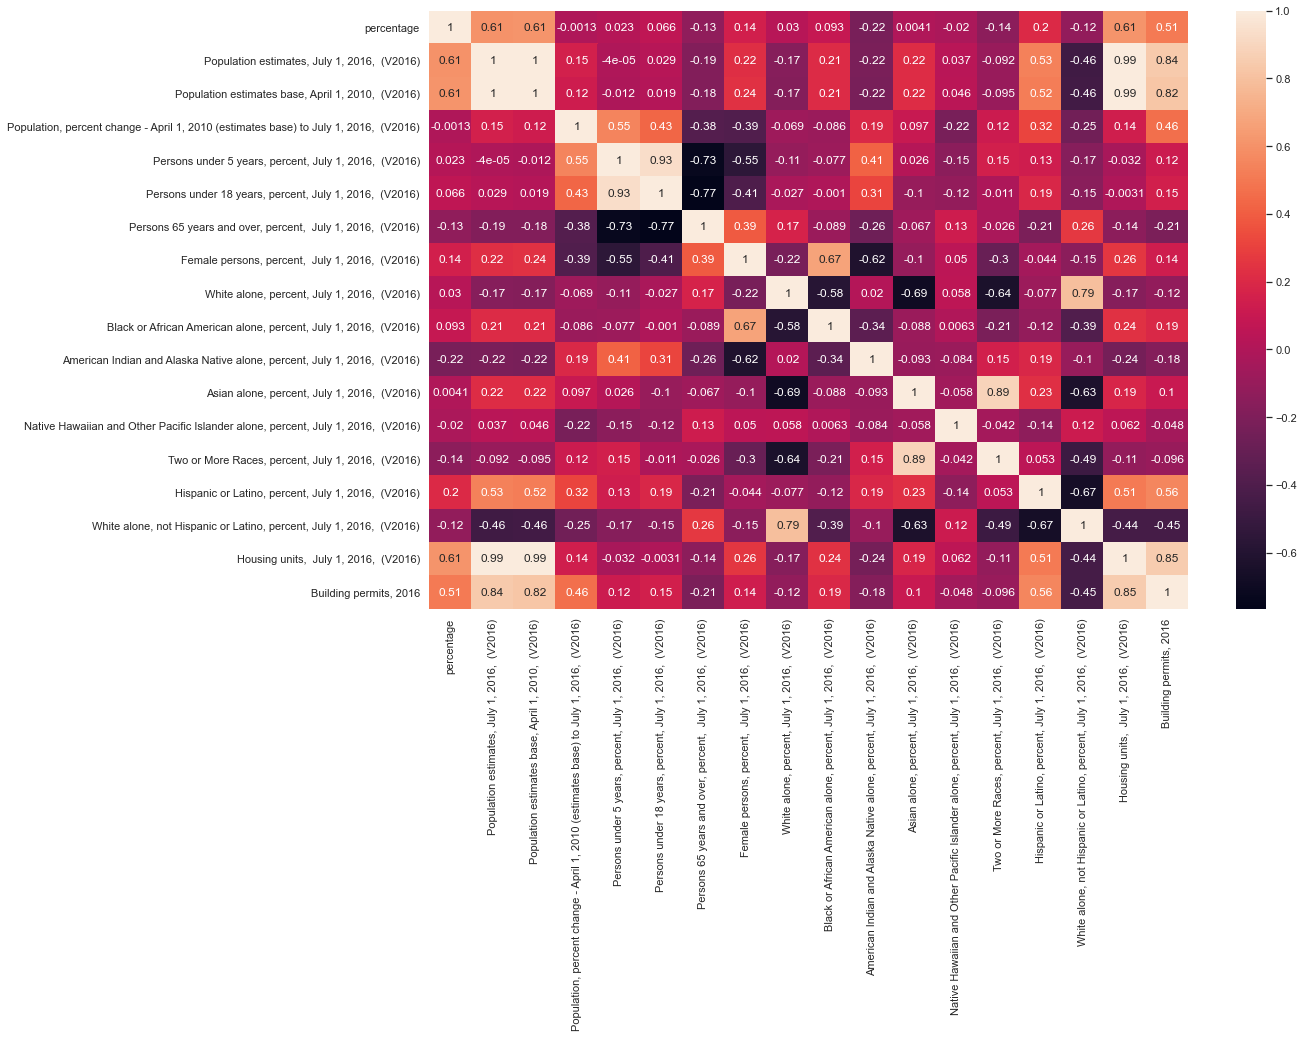

In [1916]:
#checking with a heatmap

fig, ax = plt.subplots(1,figsize=(17,11))
sns.heatmap(population_comparison.corr(),annot=True);

From the heatmap above, it's made clear that most features show very weak correlation with the amount of gun checks in each state.
Exception perhaps are the Population Estimates (and all of its directly related features like Housing permits etc) which show **positive correlation 0.61**

On the matter of race, each racial group shows no or extremely weak correlation with the % of firearm checks per state. As we can see in the list below, the highest positive correlation shows the *Hispanic or Latino* group with a correlation of 0.2.

- Hispanic or Latino - 0.2
- Black or African American - 0.093
- White - 0.03
- Asian - 0.0041
- American Indian and Alaska native - -0.22

Now we will proceed by exploring those findings with visuals.

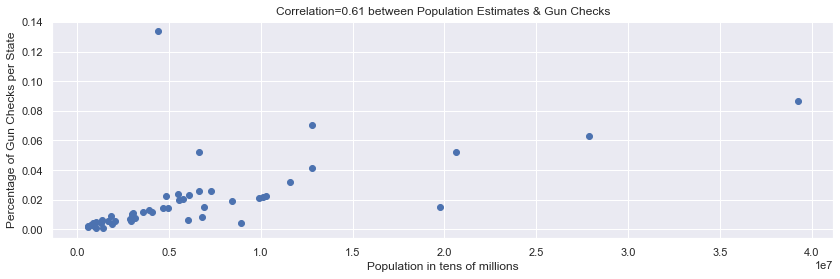

In [1917]:
#Scatterplot that shows relation between Population Estimates and Gun Checks per state
plt.figure(figsize=(14,4))
plt.scatter(x=population_comparison['Population estimates, July 1, 2016,  (V2016)'],y=population_comparison['percentage'])
plt.title('Correlation=0.61 between Population Estimates & Gun Checks')
plt.xlabel('Population in tens of millions')
plt.ylabel('Percentage of Gun Checks per State');

With a correlation of 0.61, we are able to spot this positive relation in the scatterplot above. As we move on to states with more population, it becomes more likely to also see greater gun check percentages.

However, there is a clear outlier, with a total population below 50M, it reaches a gun percentage of almost 14%.
Our previous analysis gives us an idea of which state this outlier might be, as Kentucky showed great increase and took the lead by far in gun checks for the last years.

In order to check if our hunch is true, we will proceed by creating a line graph of standardized values for Population Estimates and Gun checks.

With a correlation of 0.62, we must see both lines following a quite similar route although with visible differences. We will also be able to tell which this outlier state is that despite its small population has great gun check percentages.

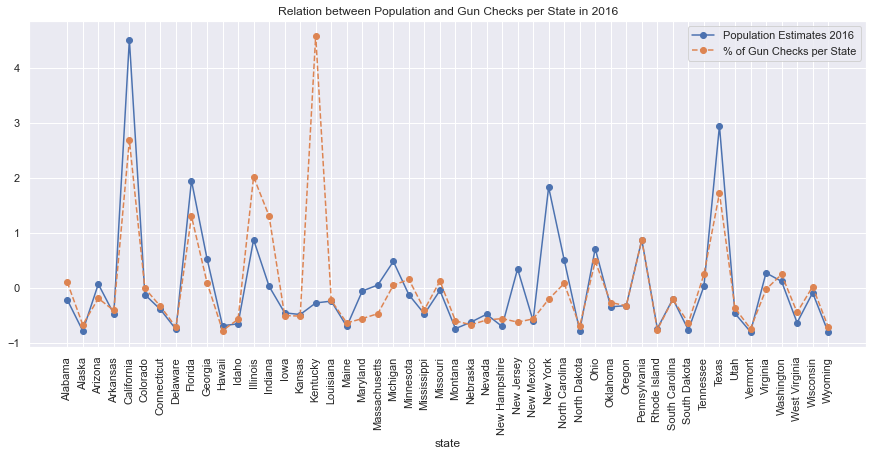

In [1918]:
#we will make use the standardize() function that we created earlier in the analysis

standardized_pop=standardize(population_comparison['Population estimates, July 1, 2016,  (V2016)'])
standardized_perc=standardize(population_comparison['percentage'])

plt.figure(figsize=(15,6))
standardized_pop.plot(marker='o',label='Population Estimates 2016')
standardized_perc.plot(marker='o',linestyle='--',label='% of Gun Checks per State')
plt.xticks(np.arange(50),labels=population_comparison.index,rotation=90)
plt.title('Relation between Population and Gun Checks per State in 2016')
plt.legend();

Our hunch was right. Kentucky was the outlier state that shows great % of gun checks despite its lower Population Estimates. The reason behind this insight is unknown to us and it may have something to do with factors that we do not examine, like the state's legislation.
Everything else seems to make sense as well.

Both lines follow a similar pattern which is just enough to justify the 0.62 correlation between them.

In order to double check that everything is on par with the rest of our analysis, we will call the plotting_percentages() function that we creater earlier, to see the percentages of each state for 2016.

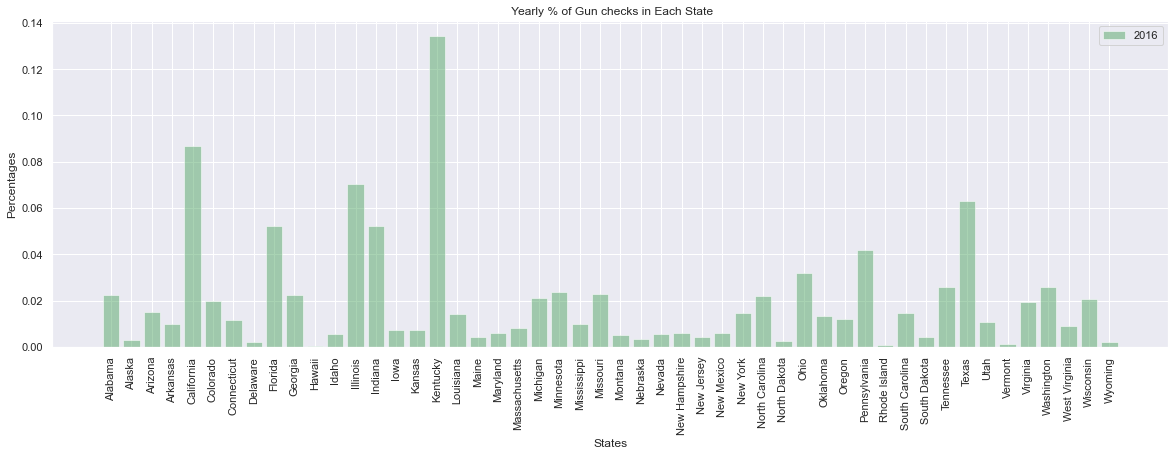

In [1919]:
plotting_percentages(['2016'])

Yes! The five states with the largest % of gun checks for 2016 are indeed what our line graph showed.
- Kentucky
- California
- Illinois
- Texas
- Indiana

Now we will continue by visualizing the correlations between gun checks and race groups.

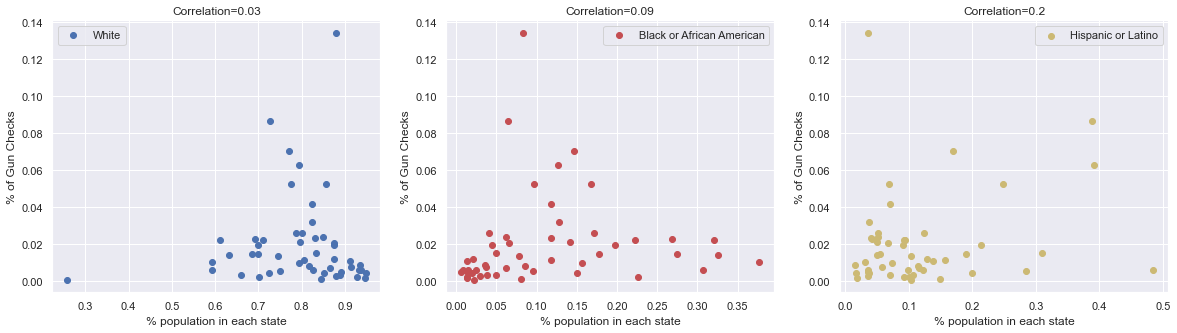

In [1920]:
fig,ax =plt.subplots(1,3,figsize=(20,5))

x1=population_comparison['White alone, percent, July 1, 2016,  (V2016)']
y1=population_comparison.percentage

ax[0].scatter(x=x1,y=y1,label='White')
ax[0].set_title('Correlation=0.03')
ax[0].set_xlabel('% population in each state')
ax[0].set_ylabel('% of Gun Checks')
ax[0].legend()

x2=population_comparison['Black or African American alone, percent, July 1, 2016,  (V2016)']
y2=population_comparison.percentage
ax[1].set_title('Correlation=0.09')
ax[1].set_xlabel('% population in each state')
ax[1].set_ylabel('% of Gun Checks')
ax[1].scatter(x=x2,y=y2,color='r',label='Black or African American')
ax[1].legend()

x3=population_comparison['Hispanic or Latino, percent, July 1, 2016,  (V2016)']
y3=population_comparison.percentage
ax[2].set_title('Correlation=0.2')
ax[2].set_xlabel('% population in each state')
ax[2].set_ylabel('% of Gun Checks')
ax[2].scatter(x=x3,y=y3,color='y',label='Hispanic or Latino')
ax[2].legend();

The correlations are extremely weak and that is clearly visible in our graphs above. Out of the three groups, Hispanic or Latino show the largest correlation that is 0.2 which is still very low. For example, as we can see, the state with the largest % in Hispanic or Latino people, that is about 50%, shows one of the lowest percentages in gun checks.

Another interesting information that we extracted here unintentionally is that the majority of states have significantly more White people than Black or Hispanic.
For example, as the graphs reveal, the largest % of White people in a state is around 95%.
While the largest % of Black and Hispanic people are ~37.5% and ~48% respectively.

As the final step of our analysis, we will create line graphs for all three groups, to see in a more detailed way the relations about each state separately.

In [1921]:
def detailed_relations(race):
    standardized_race=standardize(population_comparison[race])
    standardized_perc=standardize(population_comparison['percentage'])

    plt.figure(figsize=(15,6))
    if 'White' in race:
        standardized_race.plot(marker='o',label='% of White people',color='b')
    elif 'Black' in race:
        standardized_race.plot(marker='o',label='% of Black or African American people',color='r')
    else:
        standardized_race.plot(marker='o',label='% of Hispanic or Latino people',color='y')

    
    
    standardized_perc.plot(marker='o',linestyle='--',label='% of Gun Checks per State',color='g')
    plt.xticks(np.arange(50),labels=population_comparison.index,rotation=90)
    plt.title('Relation between Population and Gun Checks per State in 2016')
    plt.legend();

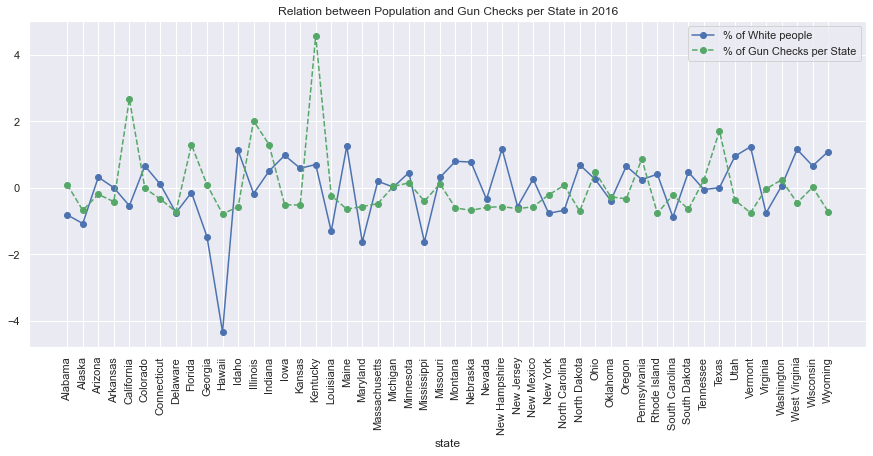

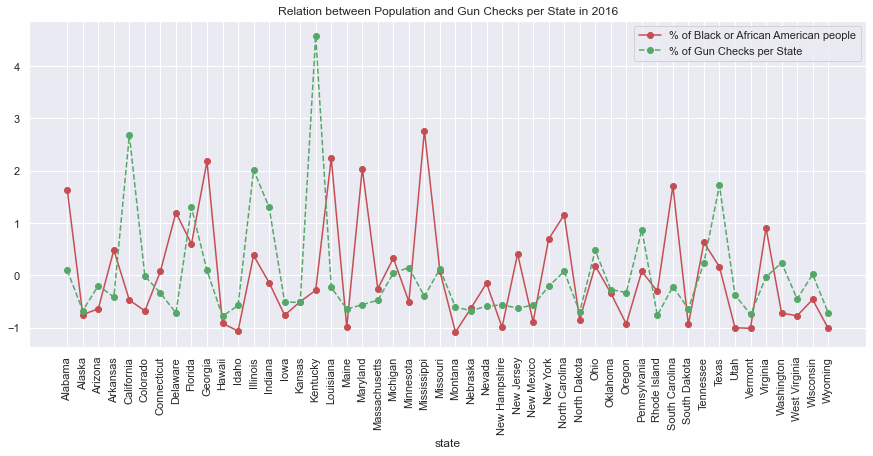

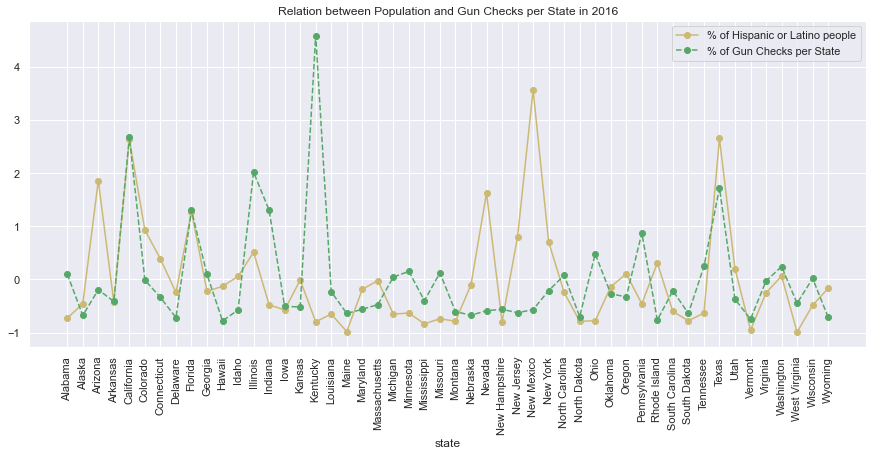

In [1922]:
race_labels=['White alone, percent, July 1, 2016,  (V2016)','Black or African American alone, percent, July 1, 2016,  (V2016)','Hispanic or Latino, percent, July 1, 2016,  (V2016)']

for i in race_labels:
    detailed_relations(i)

Our plots now just confirm the low relationship that we saw earlier in the scatterplots. The lines rarely align and when they do, it might be coincidental. 

The difference with the earlier graph that compared Population Estimates with Gun checks is crystal clear. There our lines were following a very close route as the relatively high correlation of 0.6 was dictating. Our extremely low correlation in this case cannot bring the same effect.

<a id='conclusions'></a>
## Conclusions

By tackling those 5 questions about our data, we were able to draw meaningful insights and make realizations that were not otherwise obvious. However, not all of them bear the same statistical significance.

- First we realized the trend and seasonality pattern that the gun checks follow. The first issue that we faced was the large amount of missing data that may have altered the long-term trend of gun checks from 1998 to 2017 as a major part of those data were nullified.


- Then we compared three gun types, the handgun the long gun and the 'other' type of gun. We found that the long guns were the most popular ones but that changed after 2013 and were surpassed by handguns. 

  The 'other' type of guns were suffering heavily from missing data untill 2010. From 2010 to 2017 we were able to   realize that all three types actually follow the same trend.


- Then we proceeded by checking which states had the most gun checks in 1998 and which in 2017, as well as which ones witnessed the largest different, both in absolute in numbers as well in percentages.

  Turned out that although Texas used to dominate in gun checks, Kentucky saw the largest change in absolute numbers and is currently the lead by far in gun checks across the US. Massachusets however saw the biggest % change, which equaled to 1285%.


- Then we created a function to check % contribution in gun checks of each state across the US for any year.
  Turned out that Kentucky alone offers 17.5% of gun checks across the US in 2017, whereas in 1998 the highest       percentage was that of Texas, 9%.

- We continued with exploring potential relations between our population data and the gun check data. **Those findings are tentative and cannot come to safe conclusions nor can we speak about causality based on them.**


- We explored the positive correlation between Population Estimates and Gun checks that equaled to 0.61. We saw in a line graph how both lines aligned and followed a similar trend. Exceptions however existed, like Kentucky, which despite its low population, showed great % of gun checks in 2016.

    Finally, we saw how the percentages of specific racial groups in each state can correlate to gun checks. Turned out that those correlations were extremely weak or unexistent.